In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pylab as pl

import colombia_weather
import prepare

In [2]:
df = prepare.get_prepped()

### Data Dictionary
1. region: Coffee producing region in Colombia (top 13 regions)
2. mean_precip: mean precipitation in Colombia (cm)
3. mean_temp: average temperature in Colombia region (degrees F)
4. min_temp: minimum temperature (degrees F)
5. max_temp: maximum temperature (degrees F)
6. price: export price of excelso coffee USD per lb
7. quanity: thousands of 60kg bags of coffee exported 
8. inflated: export price adjusted for inflation in 2018 dollars  

In [3]:
df.head()

quantity  price    inflated  Caldas_mean_precip  Caldas_mean_temp  \
date                                                                            
1960-01-01     782.0  45.68  387.519181            0.040000         72.500000   
1960-02-01     449.0  45.95  389.809684            0.040000         72.210526   
1960-03-01     266.0  45.10  382.598841            0.143158         71.875000   
1960-04-01     264.0  45.20  383.447176            0.525000         72.687500   
1960-05-01     602.0  44.73  379.460004            0.191000         72.181818   

            Caldas_min_temp  Cundinamarca_mean_precip  Cundinamarca_mean_temp  \
date                                                                            
1960-01-01        53.446162                  0.280000               58.250000   
1960-02-01        54.300065                  0.082857               58.894737   
1960-03-01        54.741925                  0.124545               58.347826   
1960-04-01        55.906027                  0.113750               59.687500   
1960-05-01        55.326548                  0.276555               59.458333   

            Cundinamarca_min_temp  Narino_mean_precip  ...  Tolima_min_temp  \
date                                                   ...                    
1960-01-01              30.875838            0.072655  ...        62.826583   
1960-02-01              31.438934            0.015172  ...        64.635809   
1960-03-01              34.199076            0.012903  ...        66.368796   
1960-04-01              38.081443            0.008000  ...        67.912503   
1960-05-01              38.367067            0.016774  ...        67.875379   

            Valle_mean_precip  Valle_mean_temp  Valle_min_temp  \
date                                                             
1960-01-01          -0.054432        83.394728       72.399317   
1960-02-01           0.021487        83.592275       72.199709   
1960-03-01           0.061226        83.154188       73.557848   
1960-04-01           0.204186        82.330770       71.204803   
1960-05-01           0.195359        81.782540       70.861052   

            Cesar_mean_precip  Cesar_mean_temp  Cesar_min_temp  \
date                                                             
1960-01-01           0.119673        85.574639       74.166190   
1960-02-01          -0.160911        86.849857       76.056101   
1960-03-01          -0.178350        87.567455       76.982745   
1960-04-01          -0.095321        87.131671       78.062566   
1960-05-01           0.042621        85.752403       78.742579   

            Santander_mean_precip  Santander_mean_temp  Santander_min_temp  
date                                                                        
1960-01-01               0.111732            69.105673           59.956370  
1960-02-01               0.167760            69.504415           60.659367  
1960-03-01               0.154044            69.713106           61.178475  
1960-04-01               0.203308            69.024617           61.300378  
1960-05-01               0.150532            69.160477           60.614402  

[5 rows x 42 columns]

In [4]:
df.shape

(708, 42)

In [5]:
df.describe()

quantity       price     inflated  Caldas_mean_precip  \
count   708.000000  708.000000   708.000000          708.000000   
mean    888.759887  117.042459   287.522823            0.205316   
std     381.462823   60.337486   161.812973            0.194527   
min     127.000000   37.270000    79.446600            0.000000   
25%     620.750000   62.390000   165.116364            0.117473   
50%     830.500000  122.592833   287.605531            0.189282   
75%    1096.500000  150.430000   356.107896            0.248600   
max    2755.000000  319.670000  1324.610143            2.550000   

       Caldas_mean_temp  Caldas_min_temp  Cundinamarca_mean_precip  \
count        708.000000       708.000000                708.000000   
mean          73.056972        59.601523                  0.111022   
std            1.878465         3.126061                  0.130392   
min           67.633333        41.000000                  0.000000   
25%           71.734127        58.477283                  0.052315   
50%           73.000000        60.171341                  0.091488   
75%           74.130108        61.733187                  0.142182   
max           81.000000        69.000000                  1.996667   

       Cundinamarca_mean_temp  Cundinamarca_min_temp  Narino_mean_precip  ...  \
count              708.000000             708.000000          708.000000  ...   
mean                55.799535              36.948408            0.168615  ...   
std                  1.238506               4.892166            0.208815  ...   
min                 52.096774              20.000000            0.000000  ...   
25%                 54.967742              34.000000            0.057231  ...   
50%                 55.741935              37.000000            0.136231  ...   
75%                 56.612903              40.000000            0.216435  ...   
max                 59.935484              50.000000            2.775000  ...   

       Tolima_min_temp  Valle_mean_precip  Valle_mean_temp  Valle_min_temp  \
count       708.000000         708.000000       708.000000      708.000000   
mean         68.711412           0.303984        82.500963       70.799932   
std           3.293696           0.226430         1.544705        3.481000   
min          50.000000          -0.054432        76.500000       52.000000   
25%          67.010908           0.144649        81.571429       70.000000   
50%          69.168936           0.276590        82.468180       71.550107   
75%          71.000000           0.413215        83.355415       72.000000   
max          75.000000           1.711429        87.714286       77.000000   

       Cesar_mean_precip  Cesar_mean_temp  Cesar_min_temp  \
count         708.000000       708.000000      708.000000   
mean            0.161536        85.741351       72.637999   
std             0.233844         1.780971        2.427677   
min            -0.178350        80.000000       63.000000   
25%             0.018400        84.596552       71.400667   
50%             0.123731        85.835993       72.843232   
75%             0.242173        86.963174       74.000000   
max             3.160000        91.000000       79.000000   

       Santander_mean_precip  Santander_mean_temp  Santander_min_temp  
count             708.000000           708.000000          708.000000  
mean                0.143983            71.144774           62.385355  
std                 0.198461             1.348889            2.002072  
min                 0.000000            66.000000           50.000000  
25%                 0.074420            70.168146           61.260518  
50%                 0.126492            71.100750           63.000000  
75%                 0.167565            71.965150           63.813985  
max                 4.620000            76.000000           68.000000  

[8 rows x 42 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 708 entries, 1960-01-01 to 2018-12-01
Data columns (total 42 columns):
quantity                    708 non-null float64
price                       708 non-null float64
inflated                    708 non-null float64
Caldas_mean_precip          708 non-null float64
Caldas_mean_temp            708 non-null float64
Caldas_min_temp             708 non-null float64
Cundinamarca_mean_precip    708 non-null float64
Cundinamarca_mean_temp      708 non-null float64
Cundinamarca_min_temp       708 non-null float64
Narino_mean_precip          708 non-null float64
Narino_mean_temp            708 non-null float64
Narino_min_temp             708 non-null float64
Cauca_mean_precip           708 non-null float64
Cauca_mean_temp             708 non-null float64
Cauca_min_temp              708 non-null float64
Risaralda_mean_precip       708 non-null float64
Risaralda_mean_temp         708 non-null float64
Risaralda_min_temp          708 non-null fl

### *Hypothesis: Day-to-day weather does not influence coffee prices, but unusual weather events have a great impact on prices.*

To Do:
- Look at each region independently vs price
- Look at each weather feature vs price 
- Look at the delta in temp compared to price (max vs min)
- Look at quantity vs price 
- Look at extreme events to label
- Possible statistical tests

#### Understand Price - Target 

In [7]:
# Price
pmax = df.price.max()
pmin = df.price.min()
pmean = round(df.price.mean(), 2)

print(f'The max price we have is: ${pmax}')
print(f'The min price we have for coffee is: ${pmin}')
print(f'The overall average price for coffee is: ${pmean}')

The max price we have is: $319.67
The min price we have for coffee is: $37.27
The overall average price for coffee is: $117.04


In [8]:
# Inflated price
pmax = round(df.inflated.max(), 2)
pmin = round(df.inflated.min(), 2)
pmean = round(df.inflated.mean(), 2)

print(f'The max inflated price we have is: ${pmax}')
print(f'The min inflated price we have for coffee is: ${pmin}')
print(f'The overall average inflated price for coffee is: ${pmean}')

The max inflated price we have is: $1324.61
The min inflated price we have for coffee is: $79.45
The overall average inflated price for coffee is: $287.52


In [9]:
quantity = round(df.quantity.mean(), 2)

print(f'The average quantity of coffee exported is: {quantity}')

The average quantity of coffee exported is: 888.76


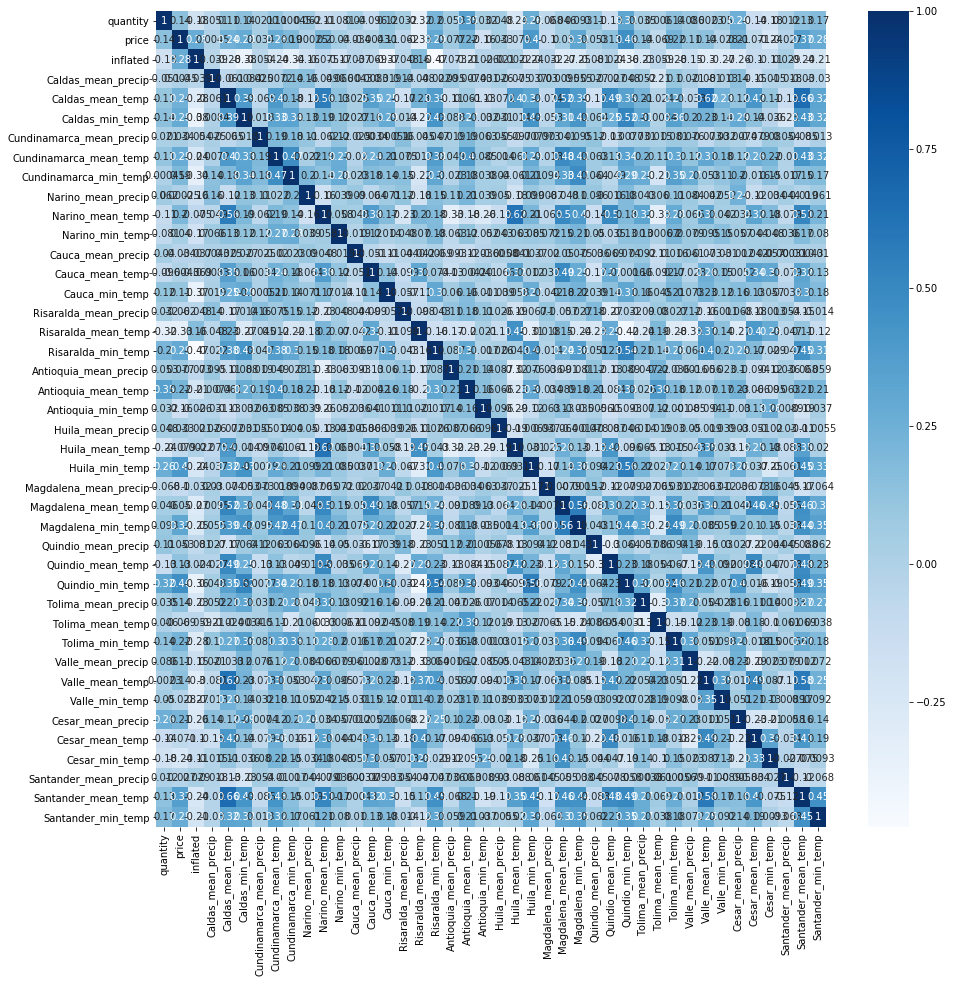

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()
# insane

What does the price distribution look like throughout the years of data obtained?

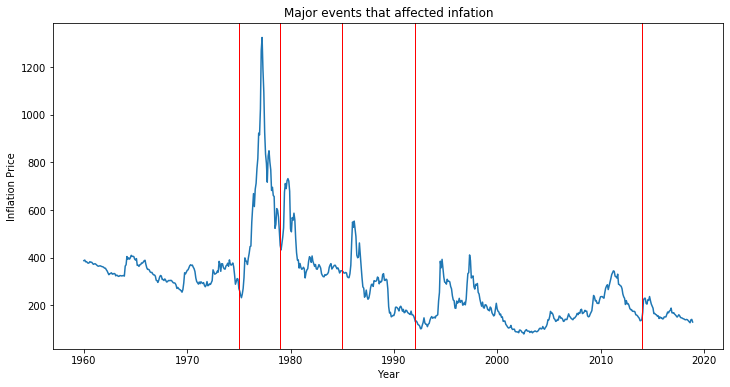

In [116]:
plt.figure(figsize=(12,6))
plt.plot(df.inflated)
date_ = '1975'
plt.axvline(pd.to_datetime(date_), linewidth=1, color='red')
datetime = '1979'
plt.axvline(pd.to_datetime(datetime), linewidth=1, color='red')
date = '1985'
plt.axvline(pd.to_datetime(date), linewidth=1, color='red')
dateevent = '1992'
plt.axvline(pd.to_datetime(dateevent), linewidth=1, color='red')
datet = '2014'
plt.axvline(pd.to_datetime(datet), linewidth=1, color='red')
plt.title('Major events that affected infation')
plt.xlabel('Year')
plt.ylabel('Inflation Price')
plt.show()
# add in vlines to show extreme weather events and annotate them

In [12]:
# There are some major spikes in the data around 1976, 1986, 1995, 1998, and 2010
# Potential causes of price spikes: look at Colombian history doc to potentially find influences of spikes/dips
# 1975: Brazilian Frost
# 1979: 
# 1985: massive volcano
# 1992: massive earthquake
# 2014: coffee rust outbreak

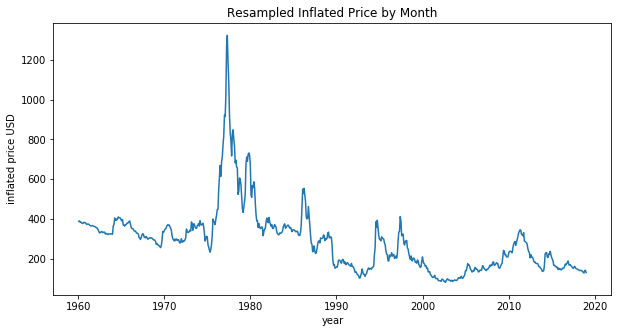

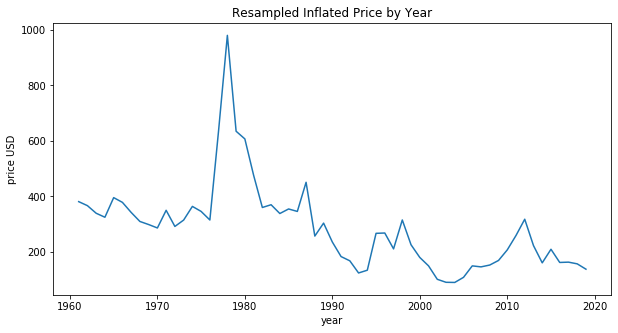

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df.inflated.resample('M').mean())
plt.title('Resampled Inflated Price by Month')
plt.xlabel('year')
plt.ylabel('inflated price USD')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(df.inflated.resample('Y').mean())
plt.title('Resampled Inflated Price by Year')
plt.xlabel('year')
plt.ylabel('price USD')
plt.show()

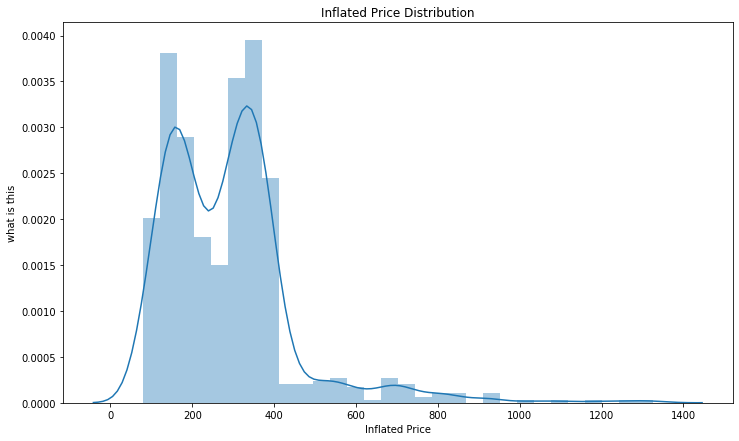

In [14]:
plt.figure(figsize=(12,7))
sns.distplot(df.inflated)
plt.title('Inflated Price Distribution')
plt.xlabel('Inflated Price')
plt.ylabel('what is this')
plt.show()

Our inflation price is bi-modal. Looking at the data over time, it appears to even out after about 1990-ish. I'll look at the data after that point to look at the distribution.

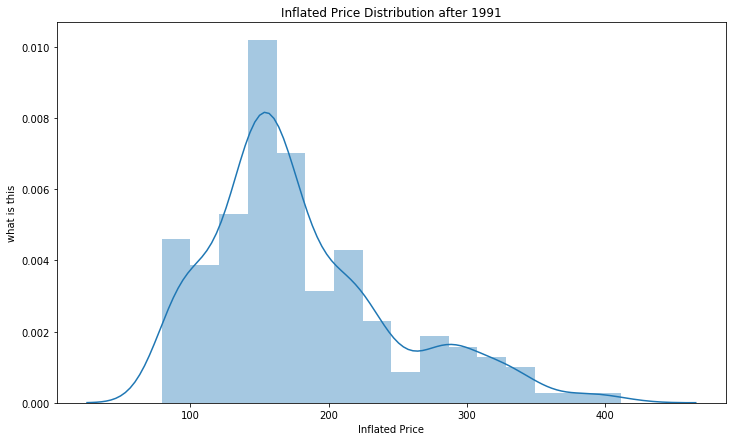

In [15]:
plt.figure(figsize=(12,7))
sns.distplot(df.inflated.loc['1991':])
plt.title('Inflated Price Distribution after 1991')
plt.xlabel('Inflated Price')
plt.ylabel('what is this')
plt.show()

Since the distribution evens out (tails to the right still but) more so in recent years than with the older data, This could be a good portion of the data to narrow in on.

## Separate out the regions

In [ ]:
caldas = pd.DataFrame()

caldas['mean_temp'] = df.Caldas_mean_temp#.loc['1991':]
caldas['min_temp'] = df.Caldas_min_temp#.loc['1991':]
caldas['precip'] = df.Caldas_mean_precip#.loc['1991':]
caldas['price'] = df.inflated#.loc['1991':] 
caldas['quantity'] = df.quantity#.loc['1991':]

antioquia = pd.DataFrame()

antioquia['precip'] = df.Antioquia_mean_precip#.loc['1991':]
antioquia['mean_temp'] = df.Antioquia_mean_temp#.loc['1991':]
antioquia['min_temp'] = df.Antioquia_min_temp#.loc['1991':]
antioquia['price'] = df.inflated#.loc['1991':]
antioquia['quantity'] = df.quantity#.loc['1991':]

cauca = pd.DataFrame()

cauca['precip'] = df.Cauca_mean_precip#.loc['1991':]
cauca['mean_temp'] = df.Cauca_mean_temp#.loc['1991':]
cauca['min_temp'] = df.Cauca_min_temp#.loc['1991':]
cauca['price'] = df.price#.loc['1991':]
cauca['quantity'] = df.quantity#.loc['1991':]

narino = pd.DataFrame()

narino['precip'] = df.Narino_mean_precip#.loc['1991':]
narino['mean_temp'] = df.Narino_mean_temp#.loc['1991':]
narino['min_temp'] = df.Narino_min_temp#.loc['1991':]
narino['price'] = df.price#.loc['1991':]
narino['quantity'] = df.quantity#.loc['1991':]

valle = pd.DataFrame()

valle['precip'] = df.Valle_mean_precip
valle['mean_temp'] = df.Valle_mean_temp
valle['min_temp'] = df.Valle_min_temp
valle['price'] = df.inflated
valle['quantity'] = df.quantity

cesar = pd.DataFrame()

cesar['precip'] = df.Cesar_mean_precip
cesar['mean_temp'] = df.Cesar_mean_temp
cesar['min_temp'] = df.Cesar_min_temp
cesar['price'] = df.inflated
cesar['quantity'] = df.quantity

tolima = pd.DataFrame()

tolima['precip'] = df.Tolima_mean_precip
tolima['mean_temp'] = df.Tolima_mean_temp
tolima['min_temp'] = df.Tolima_min_temp
tolima['price'] = df.inflated
tolima['quantity'] = df.quantity

huila = pd.DataFrame()

huila['precip'] = df.Huila_mean_precip
huila['mean_temp'] = df.Huila_mean_temp
huila['min_temp'] = df.Huila_min_temp
huila['price'] = df.inflated
huila['quantity'] = df.quantity

santander = pd.DataFrame()

santander['precip'] = df.Santander_mean_precip
santander['mean_temp'] = df.Santander_mean_temp
santander['min_temp'] = df.Santander_min_temp
santander['price'] = df.inflated
santander['quantity'] = df.quantity

magdalena = pd.DataFrame()

magdalena['precip'] = df.Magdalena_mean_precip
magdalena['mean_temp'] = df.Magdalena_mean_temp
magdalena['min_temp'] = df.Magdalena_min_temp
magdalena['price'] = df.inflated
magdalena['quantity'] = df.quantity

quindio = pd.DataFrame()

quindio['precip'] = df.Quindio_mean_precip
quindio['mean_temp'] = df.Quindio_mean_temp
quindio['min_temp'] = df.Quindio_min_temp
quindio['price'] = df.inflated
quindio['quantity'] = df.quantity

risaralda = pd.DataFrame()

risaralda['precip'] = df.Risaralda_mean_precip
risaralda['mean_temp'] = df.Risaralda_mean_temp
risaralda['min_temp'] = df.Risaralda_min_temp
risaralda['price'] = df.inflated
risaralda['quantity'] = df.quantity

cundinamarca = pd.DataFrame()

cundinamarca['precip'] = df.Cundinamarca_mean_precip
cundinamarca['mean_temp'] = df.Cundinamarca_mean_temp
cundinamarca['min_temp'] = df.Cundinamarca_min_temp
cundinamarca['price'] = df.inflated
cundinamarca['quantity'] = df.quantity

### Caldas: Cental Region

In [139]:
precip = round(caldas.mean_precip.mean(), 2)
temp = round(caldas.mean_temp.mean(), 2)
maxtemp = round(caldas.mean_temp.max(), 2)
mintemp = round(caldas.min_temp.mean(), 2)
price = round(caldas.price.mean(), 2)
quantity = round(caldas.quantity.mean(), 2)

print(f'The average precipitation in Caldas is: {precip} cm.')
print(f'The average temperature in Caldas is: {temp} F.')
print(f'The maximum temperature in Caldas (based on average temp) is: {maxtemp} F.')
print(f'The minimum temperature in Caldas is: {mintemp} F.')
print(f'The average inflated price in Caldas is: {price} (2018 USD).')
print(f'The average quantity of coffee exported is: {quantity} in thousands of 60kg bags.')

The average precipitation in Caldas is: 0.21 cm.
The average temperature in Caldas is: 73.06 F.
The maximum temperature in Caldas (based on average temp) is: 81.0 F.
The minimum temperature in Caldas is: 59.6 F.
The average inflated price in Caldas is: 287.52 (2018 USD).
The average quantity of coffee exported is: 888.76 in thousands of 60kg bags.


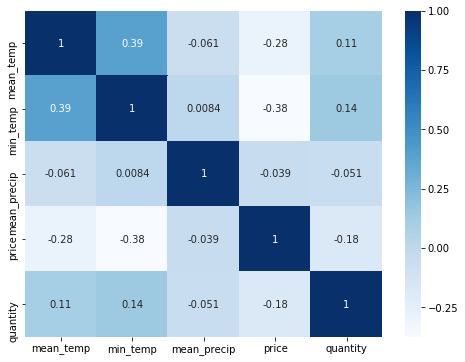

In [140]:
# Do any weather elements in this region correlate largely with price?
plt.figure(figsize=(8,6))
sns.heatmap(caldas.corr(), cmap='Blues', annot=True)
plt.show()

In [141]:
caldas.corr()
# no strong correlation

mean_temp  min_temp  mean_precip     price  quantity
mean_temp     1.000000  0.392211    -0.060994 -0.280974  0.105027
min_temp      0.392211  1.000000     0.008449 -0.375244  0.143549
mean_precip  -0.060994  0.008449     1.000000 -0.039081 -0.050503
price        -0.280974 -0.375244    -0.039081  1.000000 -0.177711
quantity      0.105027  0.143549    -0.050503 -0.177711  1.000000

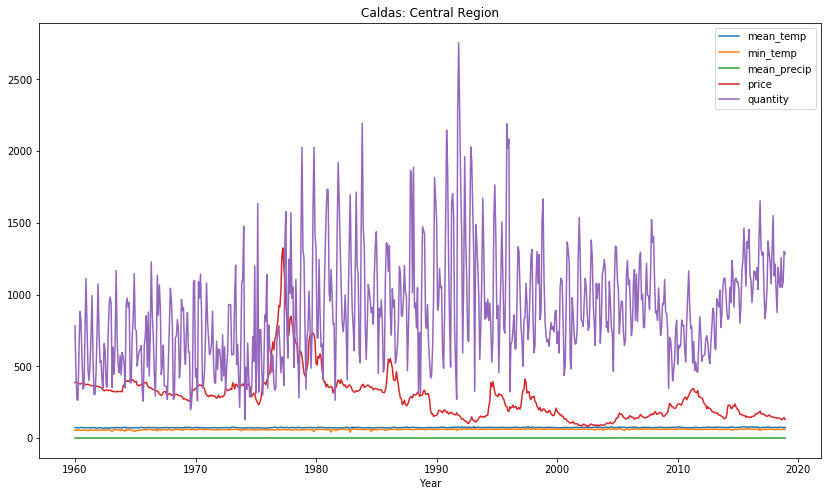

In [145]:
plt.figure(figsize=(14,8))
plt.plot(caldas)
plt.legend(caldas.columns)
plt.title('Caldas: Central Region')
plt.xlabel('Year')
plt.show()
# add in label for each different line

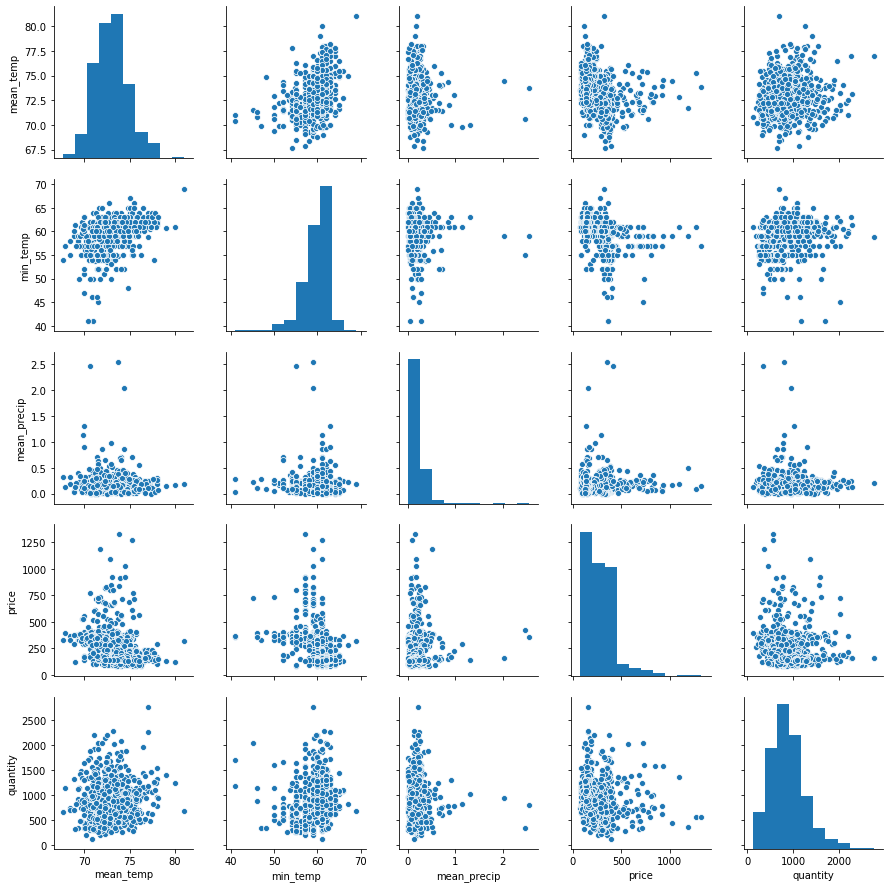

In [146]:
sns.pairplot(caldas)
plt.show()

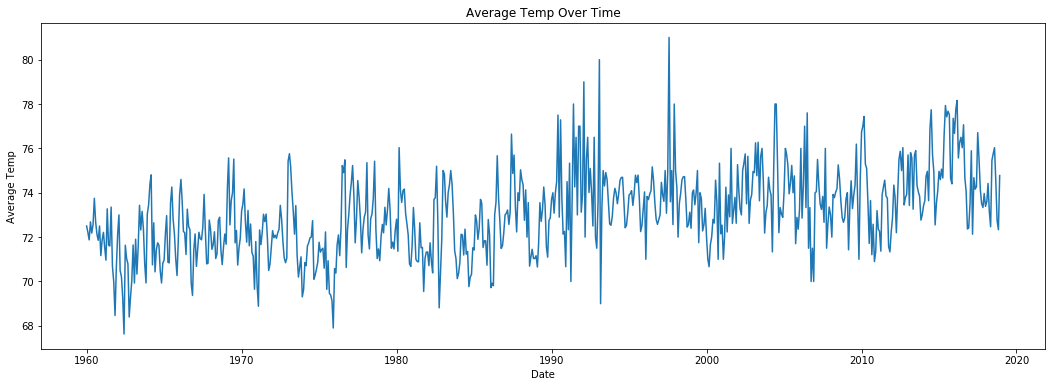

In [147]:
# Are there any major changes in temperature over time
plt.figure(figsize=(18,6))
sns.lineplot(caldas.index, caldas.mean_temp)
plt.title('Average Temp Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temp')
plt.show()

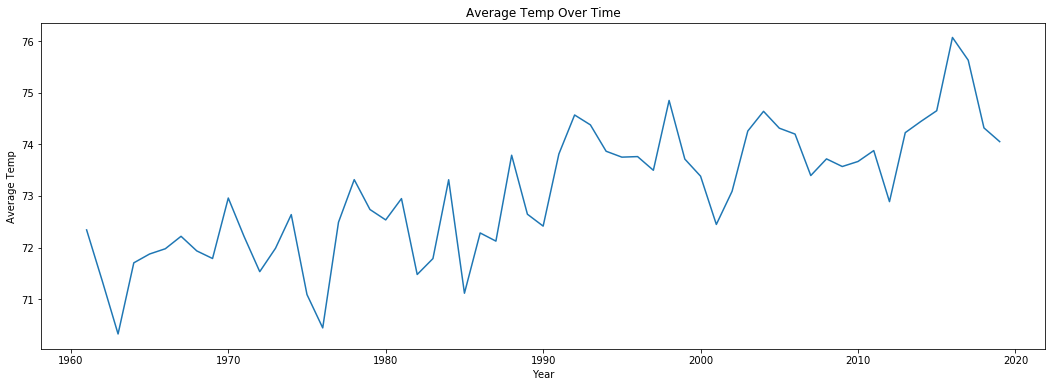

In [148]:
plt.figure(figsize=(18,6))
plt.plot(caldas.mean_temp.resample('Y').mean())
plt.title('Average Temp Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.show()

In [27]:
# average temps are subtly rising, with an all time high around 2016
# look into any recorded weather phenomena around that year that might have affected coffee production

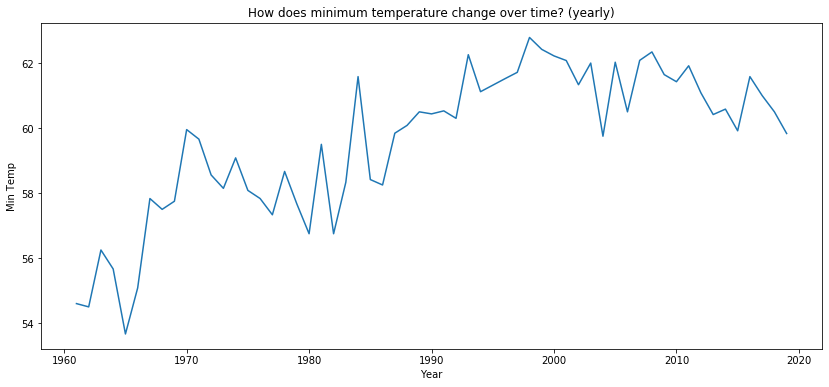

In [149]:
# How does the minimum temperature change over time?
plt.figure(figsize=(14,6))
plt.plot(caldas.min_temp.resample('Y').mean())
#plt.plot(caldas.price.resample('Y').mean())
plt.title('How does minimum temperature change over time? (yearly)')
plt.xlabel('Year')
plt.ylabel('Min Temp')
plt.show()

In [ ]:
# TO DO: Look at the low around 1965

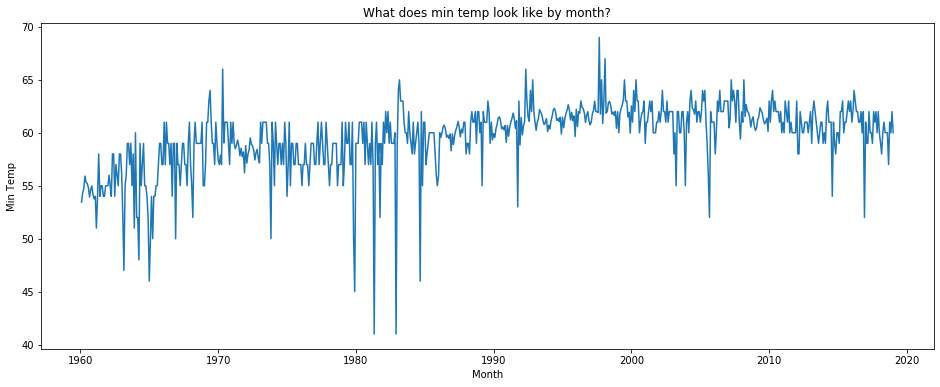

In [153]:
plt.figure(figsize=(16,6))
plt.plot(caldas.min_temp.resample('M').mean())
plt.title('What does min temp look like by month?')
plt.xlabel('Month')
plt.ylabel('Min Temp')
plt.show()

In [32]:
# There are a few major dips, around 1980. Look into possible events that could have impacted coffee

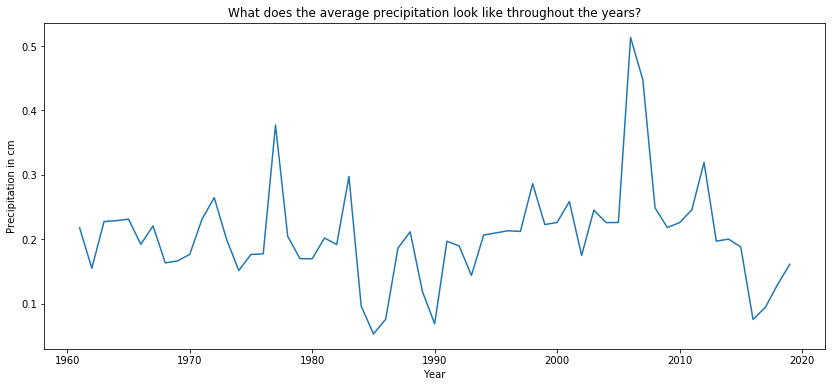

In [155]:
# What does the distribution of precipitation look like for this region?
plt.figure(figsize=(14,6))
plt.plot(caldas.mean_precip.resample('Y').mean())
plt.title('What does the average precipitation look like throughout the years?')
plt.xlabel('Year')
plt.ylabel('Precipitation in cm')
plt.show()

In [ ]:
# Look at if that high around 2008 impacted coffee farms, or the low around 1985 and 2016
# 1985 was the worst flood in Colombian history
# TO DO: annotate 

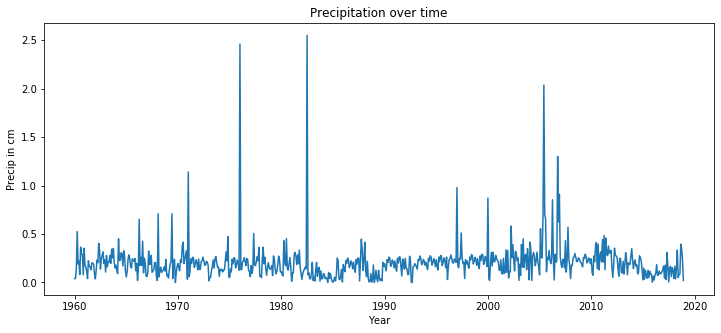

In [158]:
# precip
plt.figure(figsize=(12,5))
plt.plot(caldas.mean_precip)
plt.title('Precipitation over time')
plt.xlabel('Year')
plt.ylabel('Precip in cm')
plt.show()

In [ ]:
# Look into major spike and annotate them if they impacted coffee prices

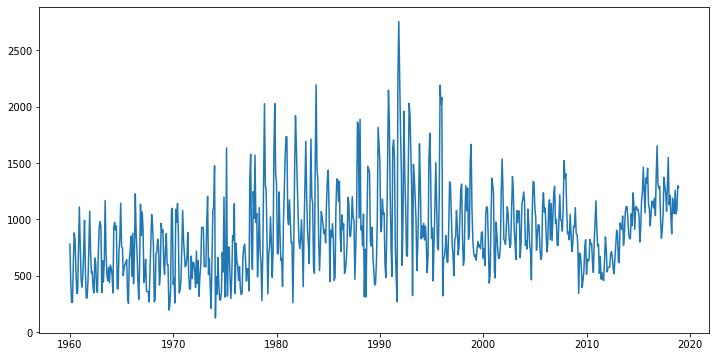

In [198]:
plt.figure(figsize=(12,6))
plt.plot(caldas.quantity)
plt.show()

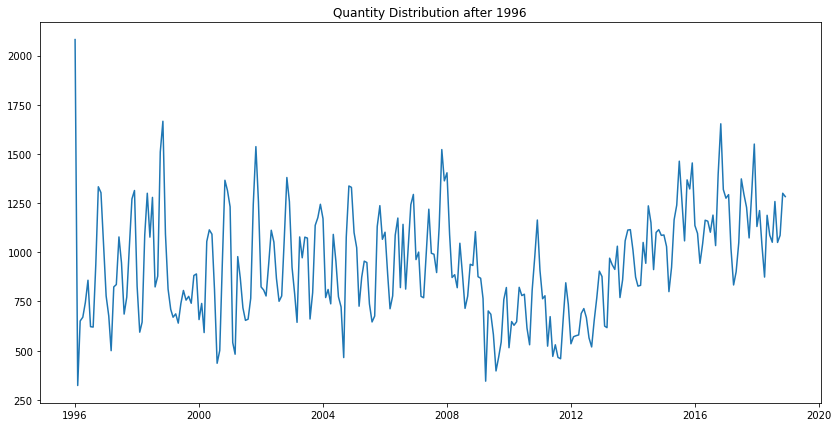

In [204]:
plt.figure(figsize=(14,7))
plt.plot(caldas.quantity.loc['1996':])
plt.title('Quantity Distribution after 1996')
plt.show()

In [ ]:
# Quantity held smooths out after 1996 compared to the rest of the time. 
# Market probably stabalized more in knowing their need to stockpile

### Antioquia: Central Zone

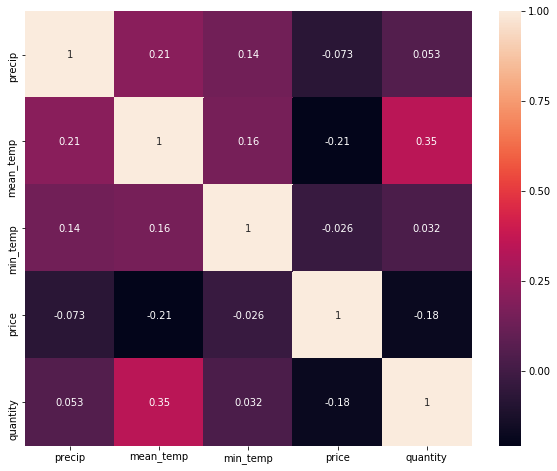

In [208]:
plt.figure(figsize=(10,8))
sns.heatmap(antioquia.corr(), annot=True)
plt.show()

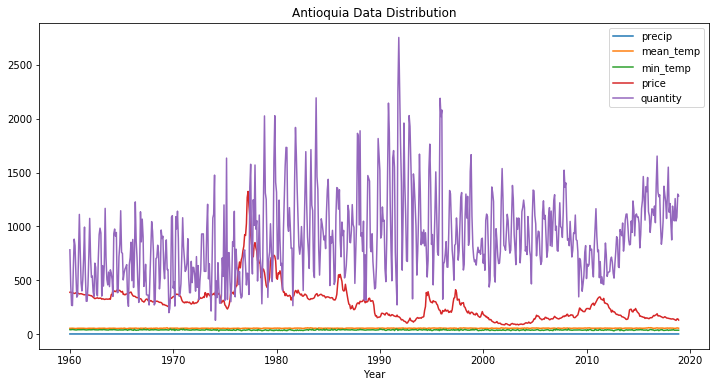

In [210]:
plt.figure(figsize=(12,6))
plt.plot(antioquia)
plt.title('Antioquia Data Distribution')
plt.legend(antioquia.columns)
plt.xlabel('Year')
plt.show()

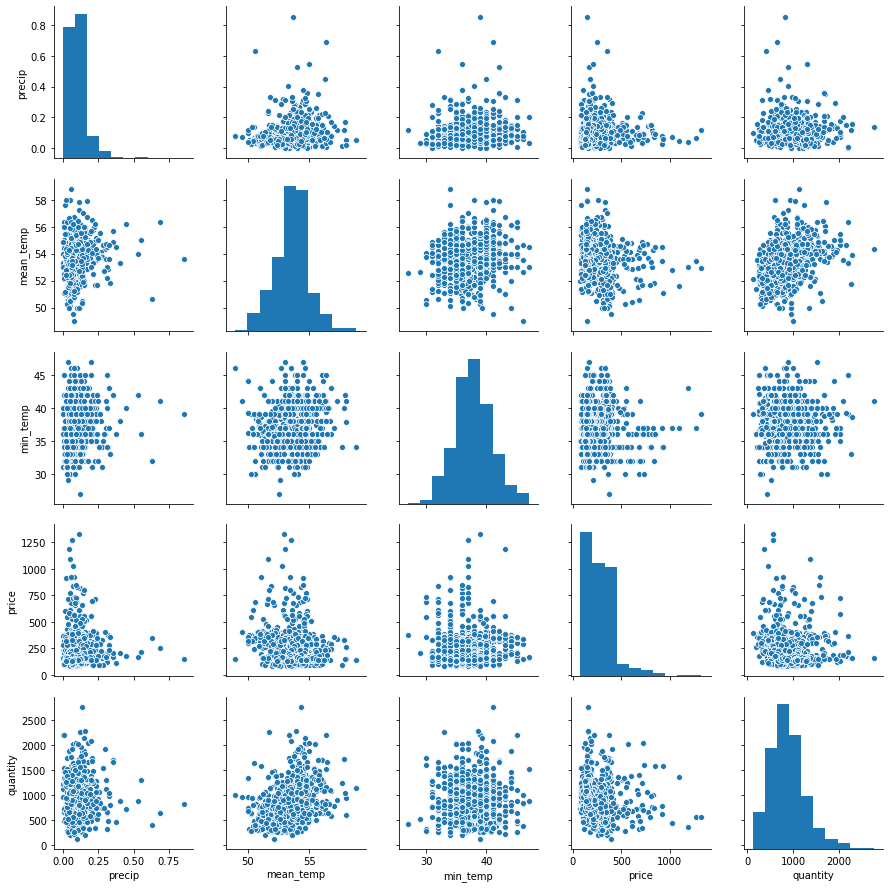

In [211]:
sns.pairplot(antioquia)
plt.show()

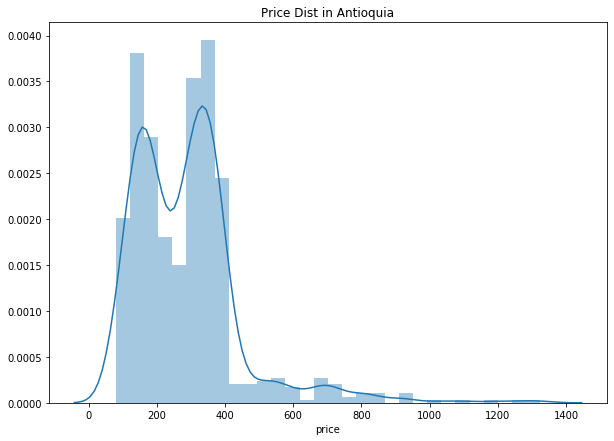

In [212]:
plt.figure(figsize=(10,7))
sns.distplot(antioquia.price)
plt.title('Price Dist in Antioquia')
plt.show()

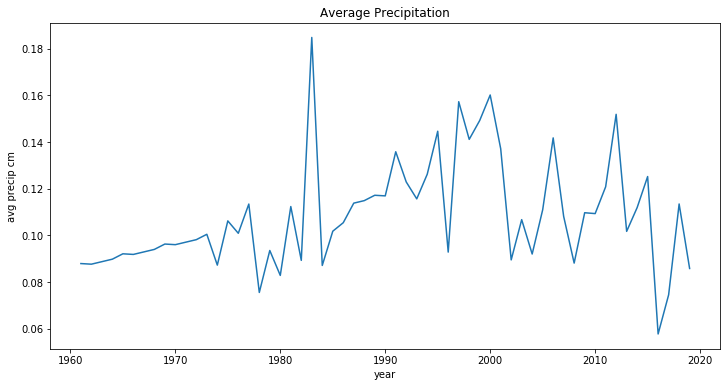

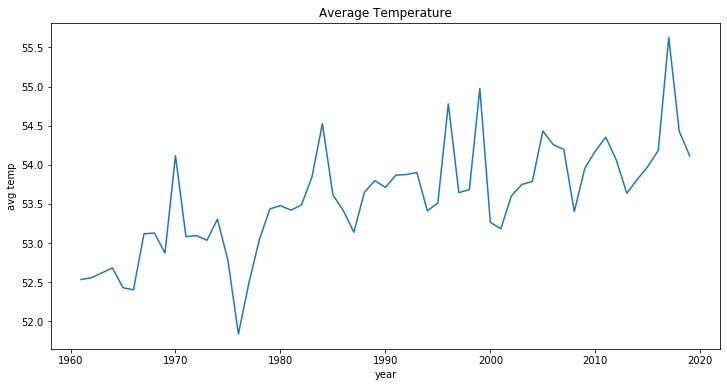

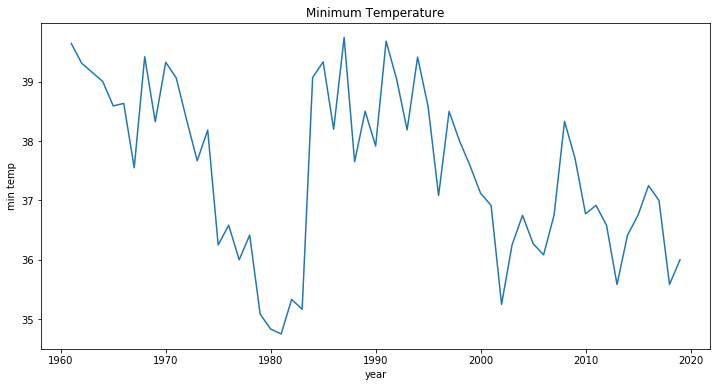

In [213]:
# What do the individual feature distributions look like?
plt.figure(figsize=(12,6))
plt.plot(antioquia.precip.resample('Y').mean())
plt.title('Average Precipitation')
plt.xlabel('year')
plt.ylabel('avg precip cm')
plt.show()
plt.figure(figsize=(12,6))
plt.plot(antioquia.mean_temp.resample('Y').mean())
plt.title('Average Temperature')
plt.xlabel('year')
plt.ylabel('avg temp')
plt.show()
plt.figure(figsize=(12,6))
plt.plot(antioquia.min_temp.resample('Y').mean())
plt.title('Minimum Temperature')
plt.xlabel('year')
plt.ylabel('min temp')
plt.show()

In [48]:
# There are peaks and valleys in the data. Describe possible causes in the largest of those

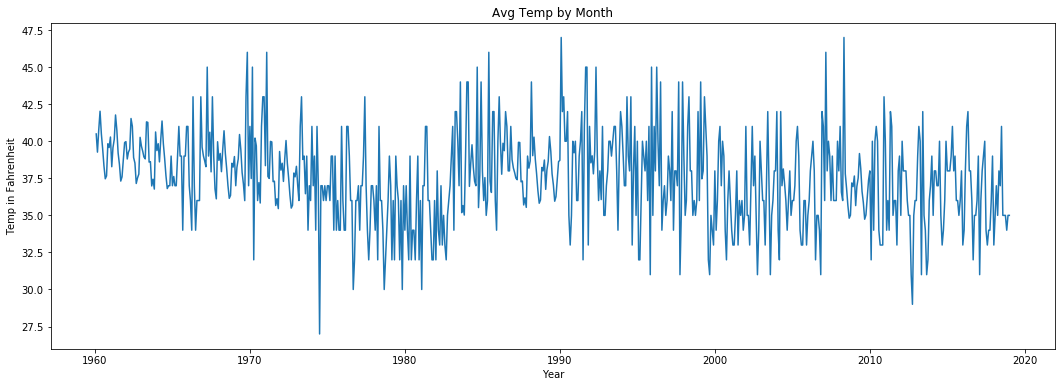

In [219]:
plt.figure(figsize=(18,6))
plt.plot(antioquia.min_temp.resample("M").mean())
plt.title('Avg Temp by Month')
plt.ylabel('Temp in Fahrenheit')
plt.xlabel('Year')
plt.show()

In [55]:
# There is a cluster towards the lower end of the precipitation, a few outliers in higher ranges of precip
# Price appears to be higher with lower precip, mid-range to low with lower precipitation
# A slight negative trend, look into this deeper

### Cauca: South Zone

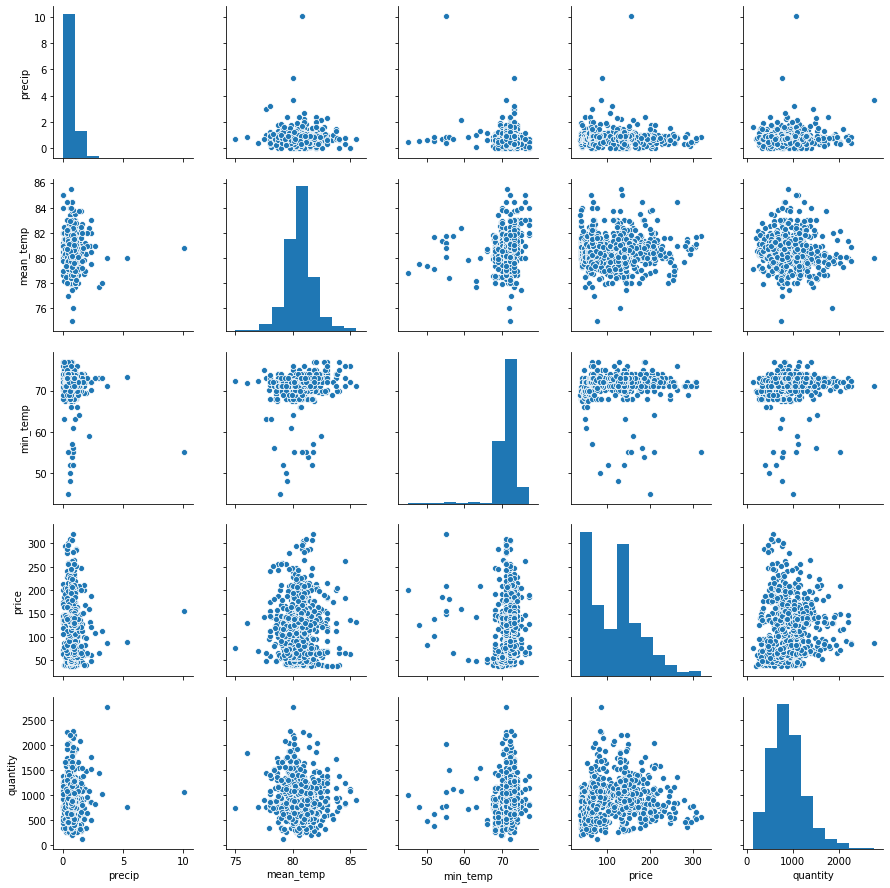

In [333]:
sns.pairplot(cauca)
plt.show()

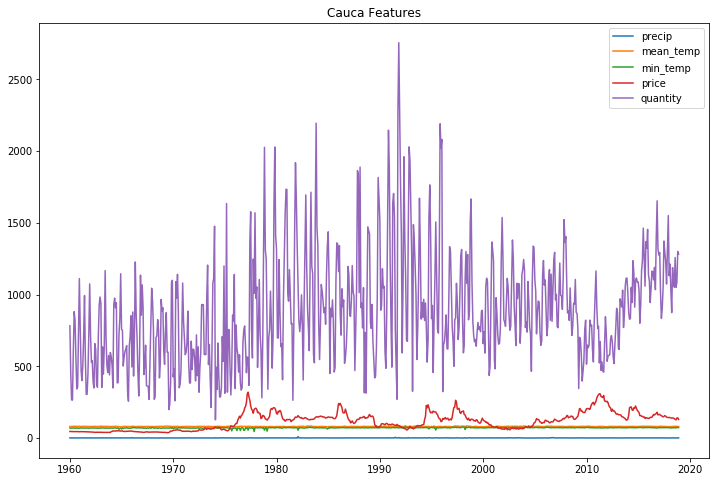

In [228]:
plt.figure(figsize=(12,8))
plt.plot(cauca)
plt.title('Cauca Features')
plt.legend(cauca.columns)
plt.show()
# label features

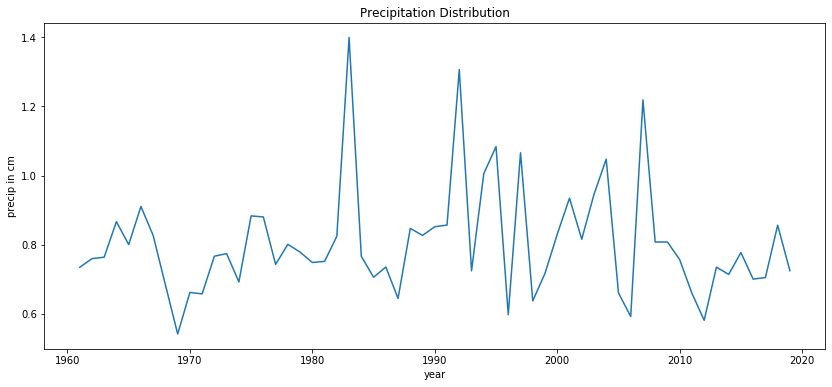

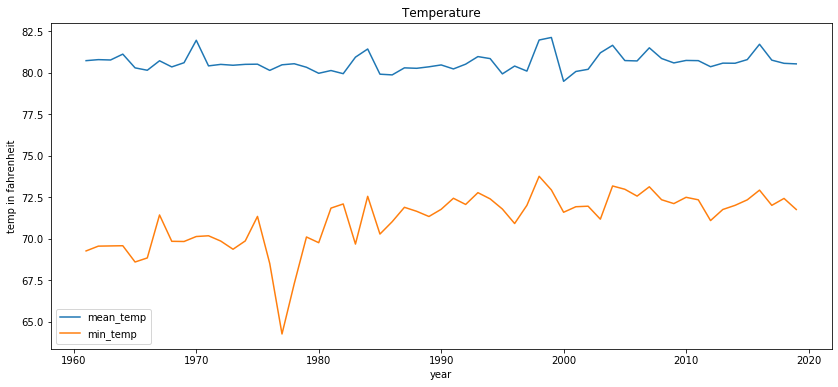

In [231]:
plt.figure(figsize=(14,6))
plt.plot(cauca.precip.resample("Y").mean())
plt.title('Precipitation Distribution')
plt.xlabel('year')
plt.ylabel('precip in cm')
plt.show()
plt.figure(figsize=(14,6))
plt.plot(cauca.mean_temp.resample("Y").mean())
plt.plot(cauca.min_temp.resample("Y").mean())
plt.title('Temperature')
plt.xlabel('year')
plt.ylabel('temp in fahrenheit')
plt.legend(cauca[['mean_temp', 'min_temp']])
plt.show()

#plt.title('Average Temperature')
# plt.xlabel('year')
# plt.ylabel('temp in fahrenheit')
# plt.show()
#plt.figure(figsize=(14,6))

In [63]:
# Look into the precip spikes and temp dips
# There are no major spike in temp

### Narino: South Zone

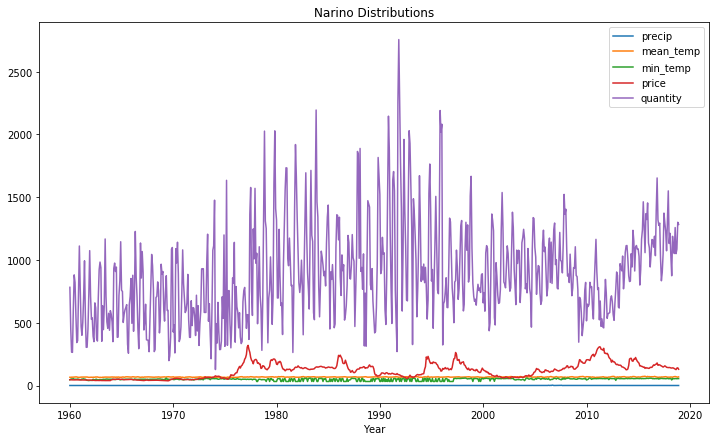

In [337]:
plt.figure(figsize=(12,7))
plt.plot(narino)
plt.title('Narino Distributions')
plt.xlabel('Year')
plt.legend(narino.columns)
plt.show()

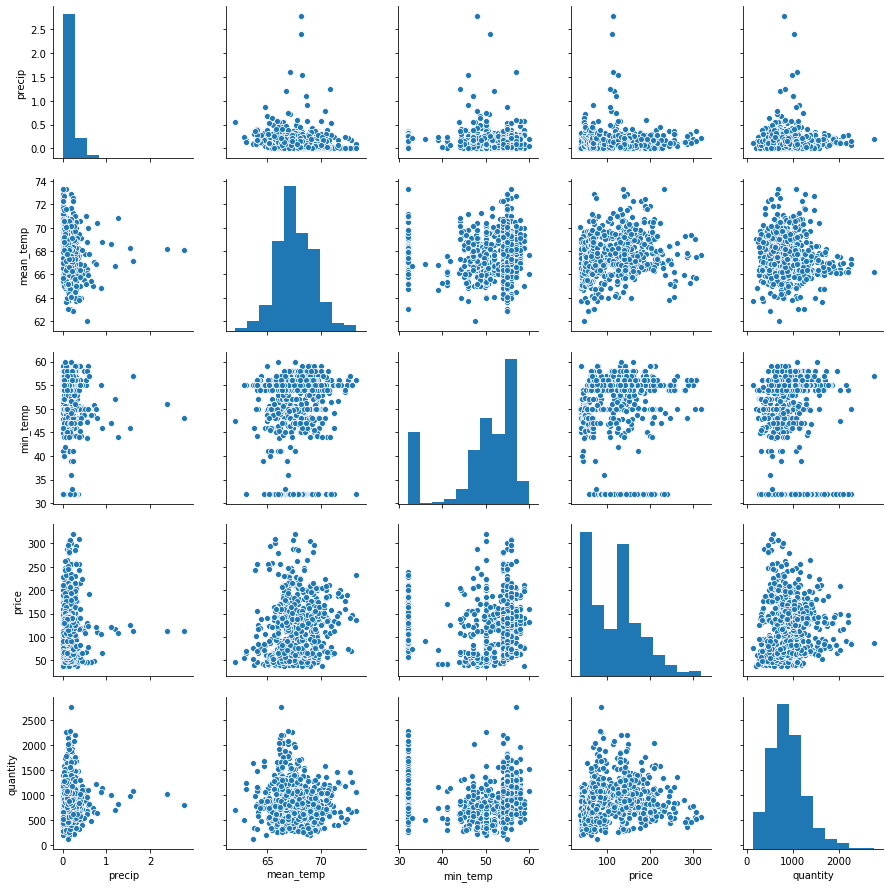

In [241]:
sns.pairplot(narino)
plt.show()

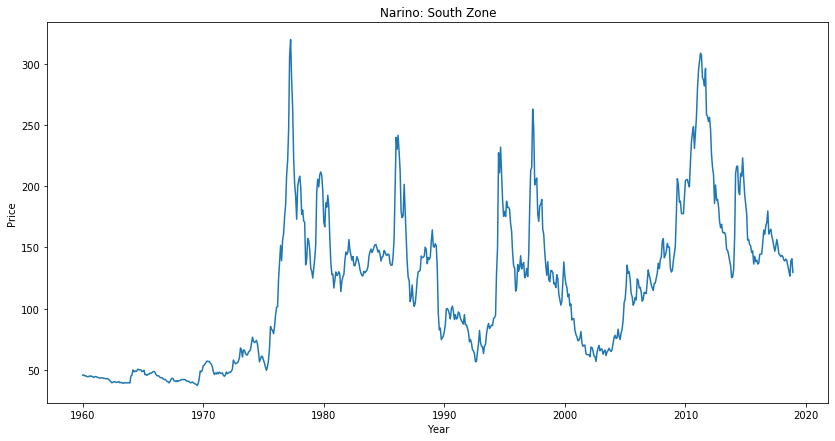

In [244]:
plt.figure(figsize=(14,7))
plt.plot(narino.price)
plt.title('Narino: South Zone')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

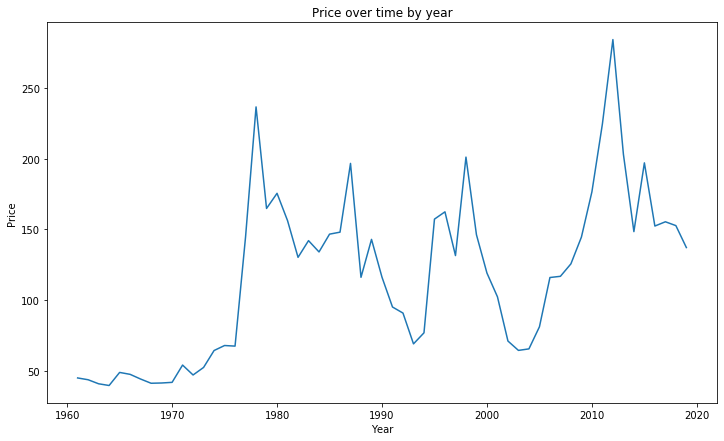

In [247]:
plt.figure(figsize=(12,7))
plt.plot(narino.price.resample('Y').mean())
plt.title('Price over time by year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

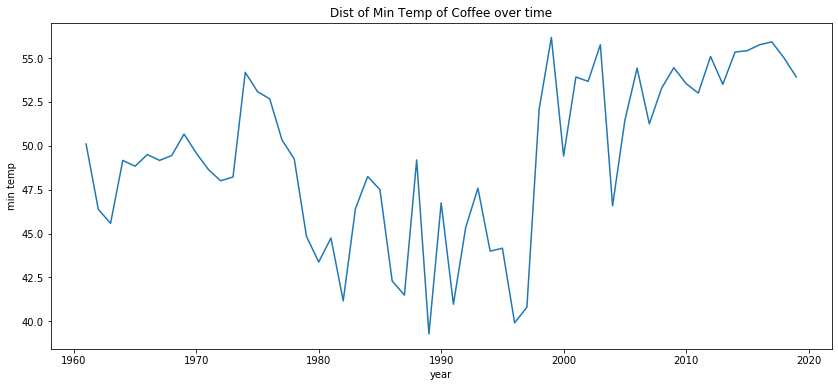

In [349]:
plt.figure(figsize=(14,6))
plt.plot(narino.min_temp.resample('Y').mean())
plt.title('Dist of Min Temp of Coffee over time')
plt.xlabel('year')
plt.ylabel('min temp')
plt.show()

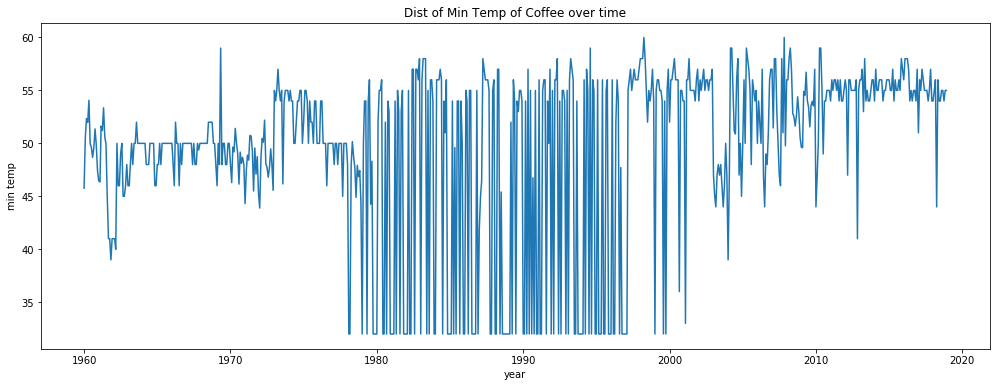

In [348]:
plt.figure(figsize=(17,6))
plt.plot(narino.min_temp)
plt.title('Dist of Min Temp of Coffee over time')
plt.xlabel('year')
plt.ylabel('min temp')
plt.show()

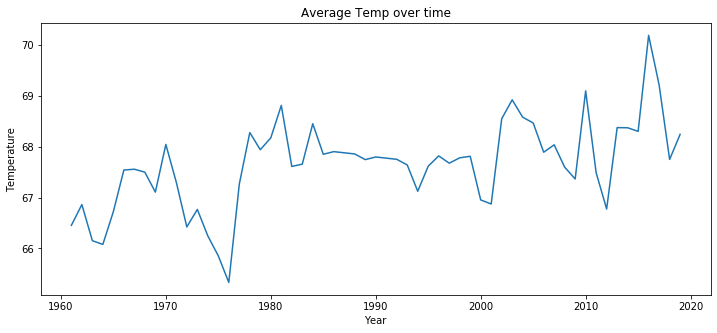

In [353]:
plt.figure(figsize=(12,5))
plt.plot(narino.mean_temp.resample("Y").mean())
plt.title('Average Temp over time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

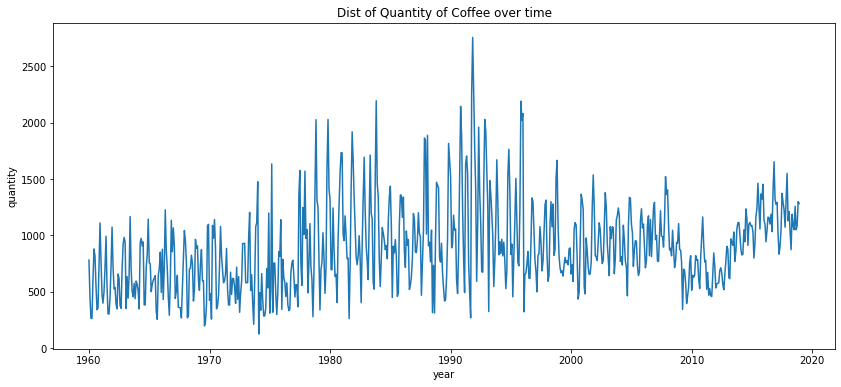

In [265]:
plt.figure(figsize=(14,6))
plt.plot(narino.quantity)
plt.title('Dist of Quantity of Coffee over time')
plt.xlabel('year')
plt.ylabel('quantity')
plt.show()

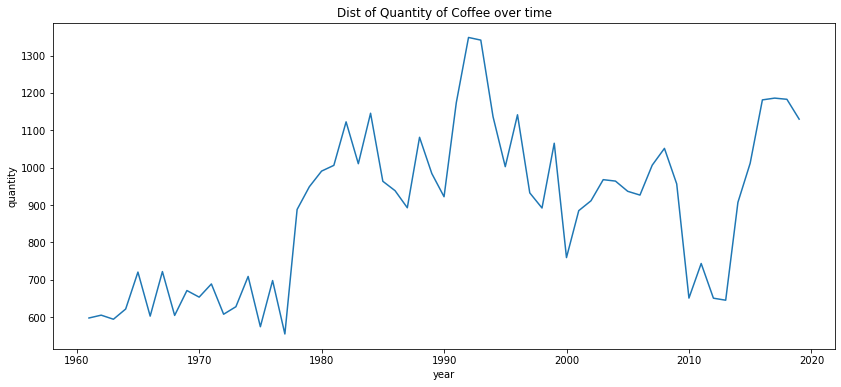

In [267]:
plt.figure(figsize=(14,6))
plt.plot(narino.quantity.resample('Y').mean())
plt.title('Dist of Quantity of Coffee over time')
plt.xlabel('year')
plt.ylabel('quantity')
plt.show()

In [355]:
# Insteresting shape compared to other regions

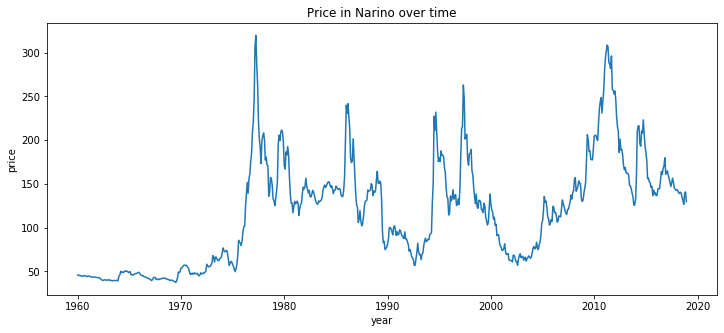

In [357]:
plt.figure(figsize=(12,5))
plt.plot(narino.price)
plt.title('Price in Narino over time')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

### Valle: Central Zone

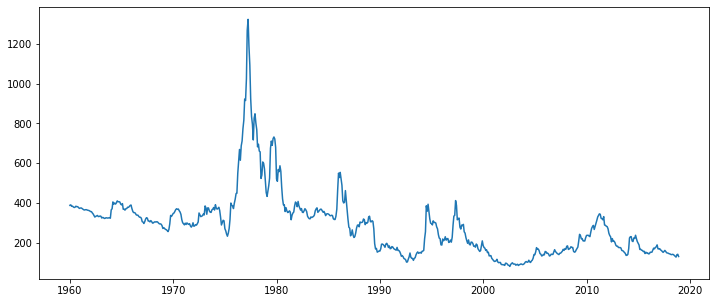

In [279]:
plt.figure(figsize=(12,5))
plt.plot(valle.price)
plt.show()

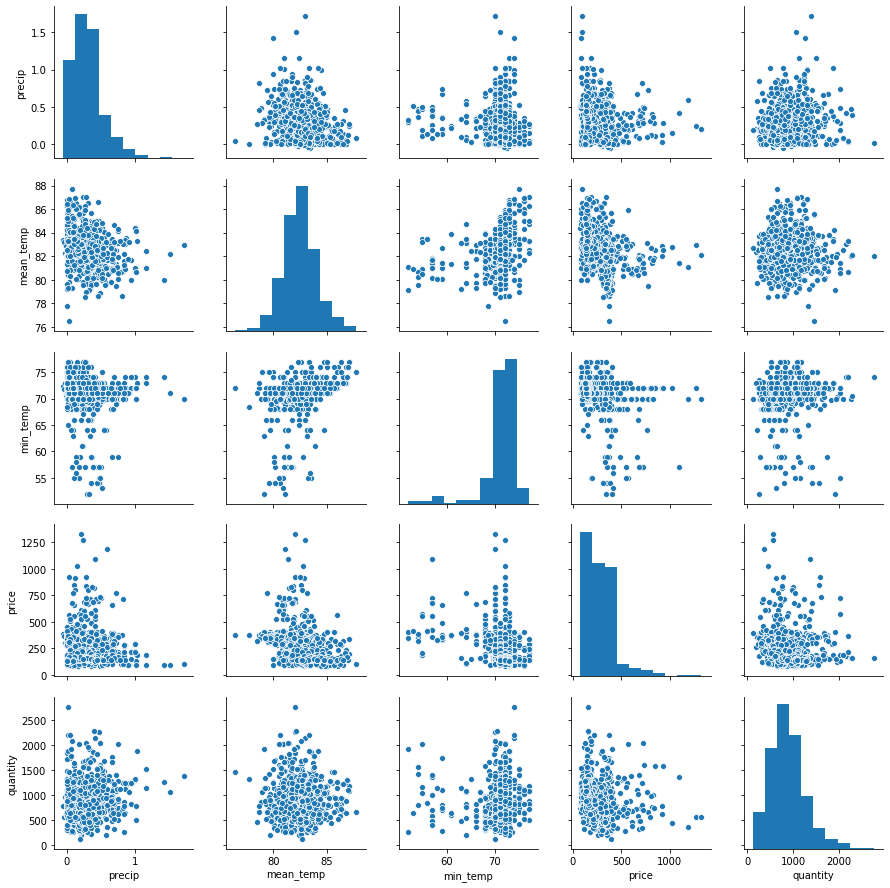

In [339]:
sns.pairplot(valle)
plt.show()

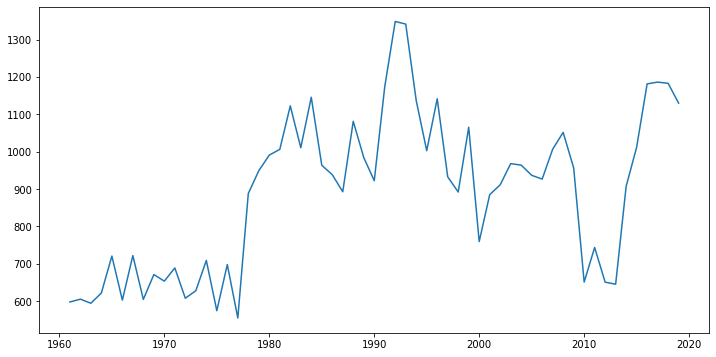

In [359]:
plt.figure(figsize=(12,6))
plt.plot(valle.quantity.resample('Y').mean())
plt.show()

### Average Temp

- Look at the average temperature of each region to see if anything major jumps out.

In [327]:
def show_mean_temp():
    plt.figure(figsize=(12,6))
    sns.scatterplot(huila.mean_temp, huila.price)
    plt.title('Huila: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cauca.mean_temp, cauca.price)
    plt.title('Cauca: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(narino.mean_temp, narino.price)
    plt.title('Narino: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(caldas.mean_temp, caldas.price)
    plt.title("Caldas: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(risaralda.mean_temp, risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(antioquia.mean_temp, antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(quindio.mean_temp, quindio.price)
    plt.title('Quindio: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(tolima.min_temp, tolima.price)
    plt.title('Tolima: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(valle.mean_temp, valle.price)
    plt.title('Valle: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cesar.mean_temp, cesar.price)
    plt.title('Cesar: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(magdalena.mean_temp, magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(santander.mean_temp, santander.price)
    plt.title("Santander: East Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cundinamarca.mean_temp, cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.show()
    

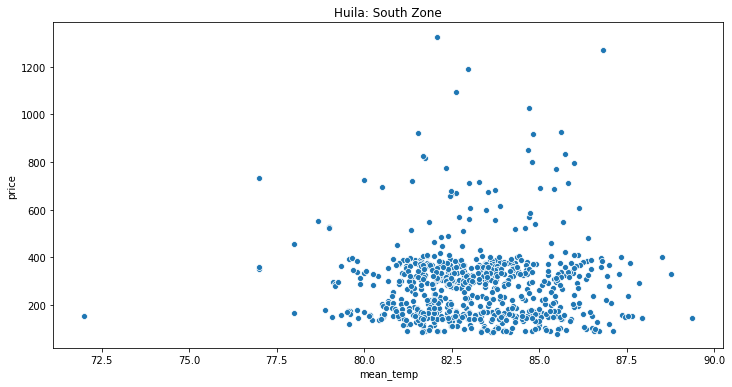

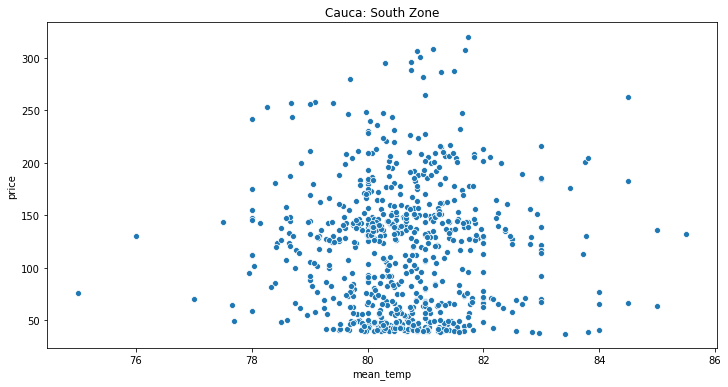

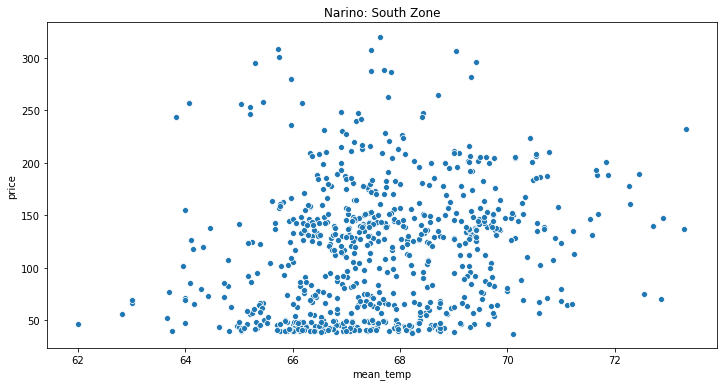

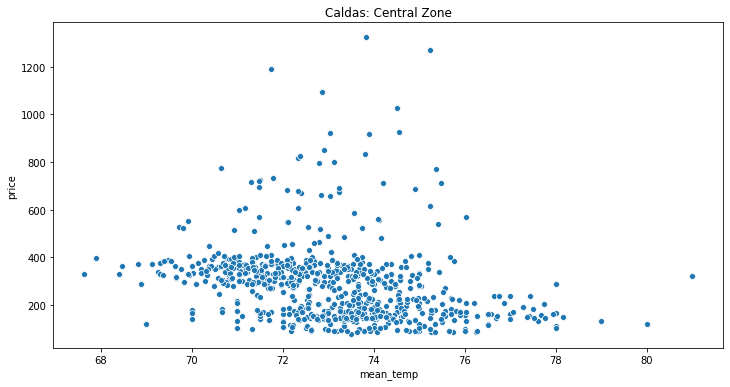

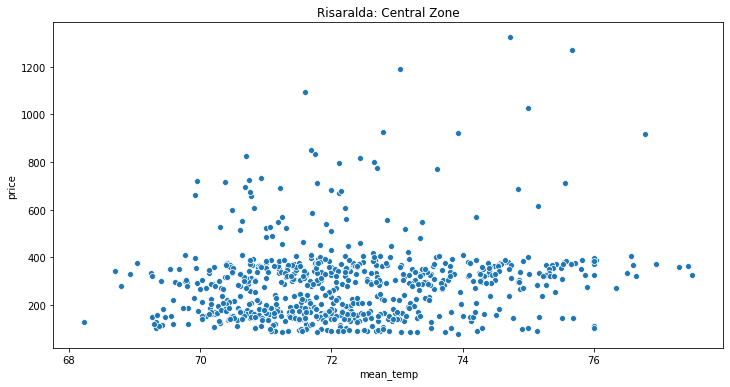

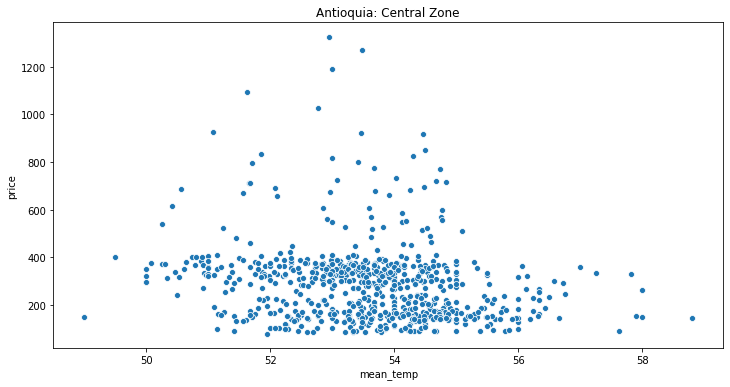

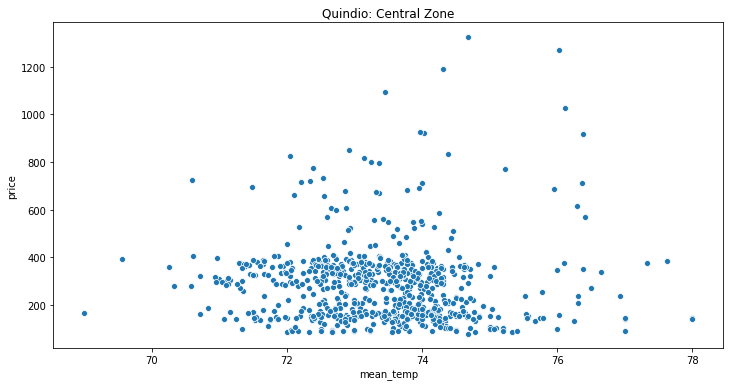

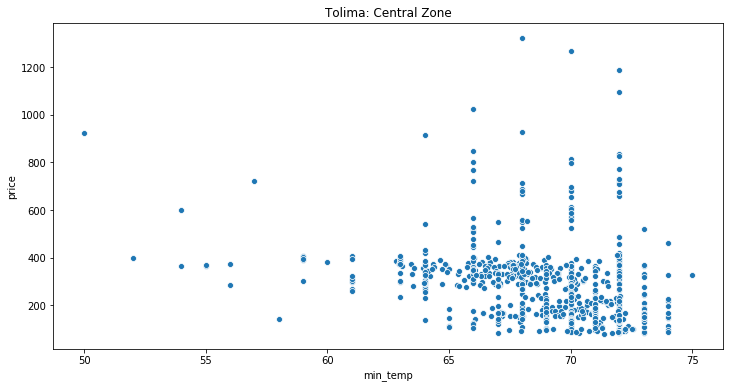

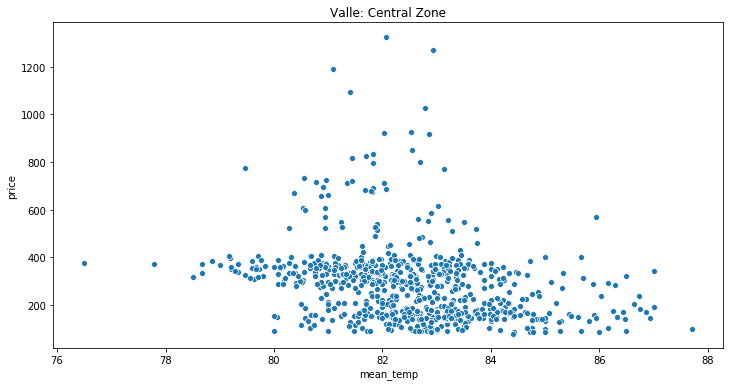

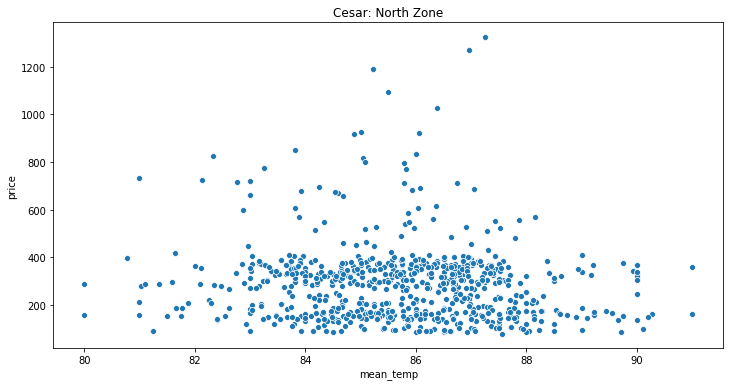

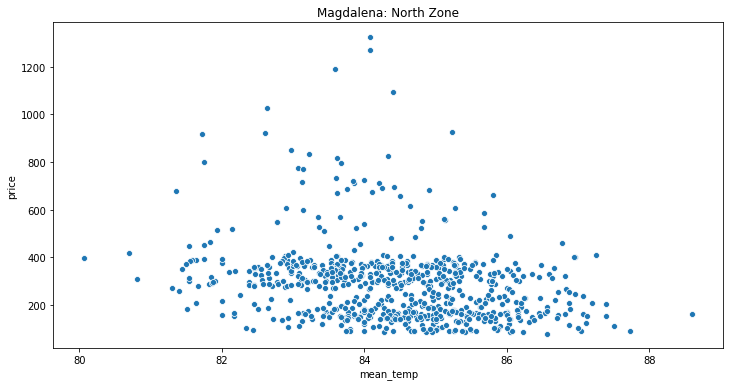

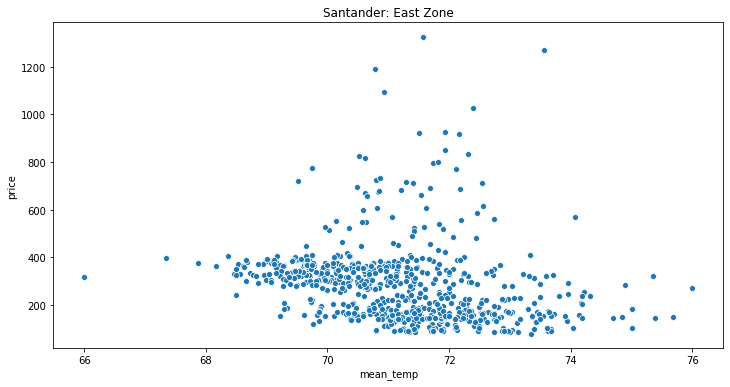

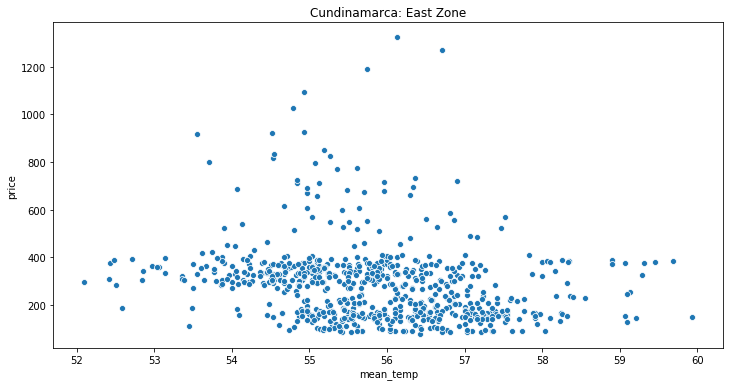

In [328]:
show_mean_temp()

### Min Temp
- Look at the min temperature of each region to see if anything sticks out.

In [317]:
def show_min_temp():
    plt.figure(figsize=(12,6))
    sns.scatterplot(huila.min_temp, huila.price)
    plt.title('Huila: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cauca.min_temp, cauca.price)
    plt.title('Cauca: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(narino.min_temp, narino.price)
    plt.title('Narino: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(caldas.min_temp, caldas.price)
    plt.title("Caldas: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(risaralda.min_temp, risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(antioquia.min_temp, antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(quindio.min_temp, quindio.price)
    plt.title('Quindio: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(tolima.min_temp, tolima.price)
    plt.title('Tolima: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(valle.min_temp, valle.price)
    plt.title('Valle: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cesar.min_temp, cesar.price)
    plt.title('Cesar: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(magdalena.min_temp, magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(santander.min_temp, santander.price)
    plt.title("Santander: East Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cundinamarca.min_temp, cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.show()
    

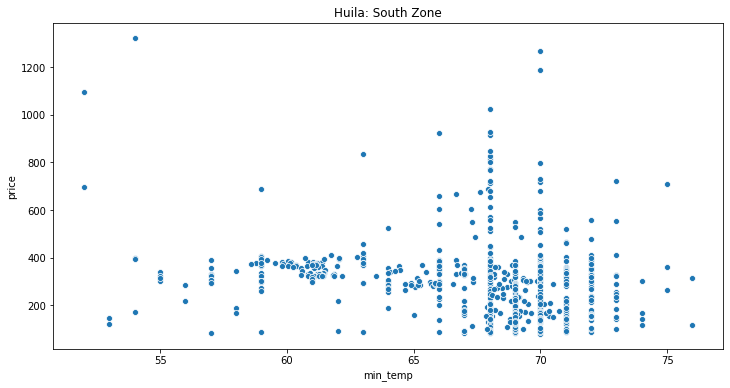

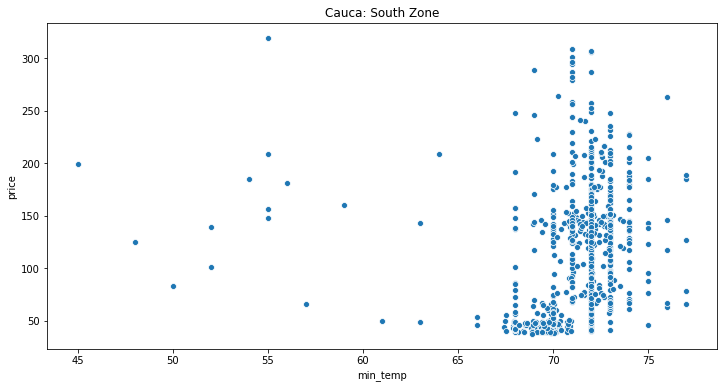

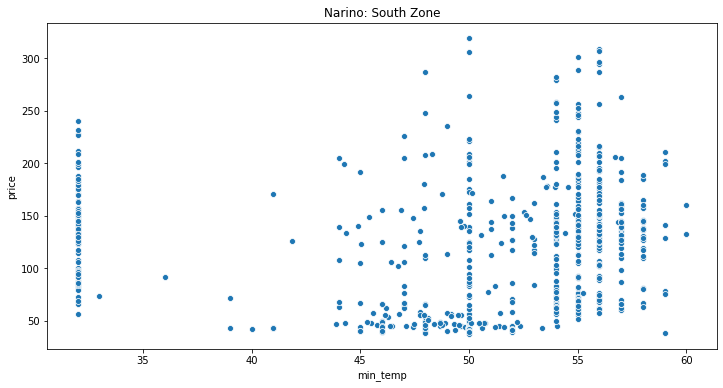

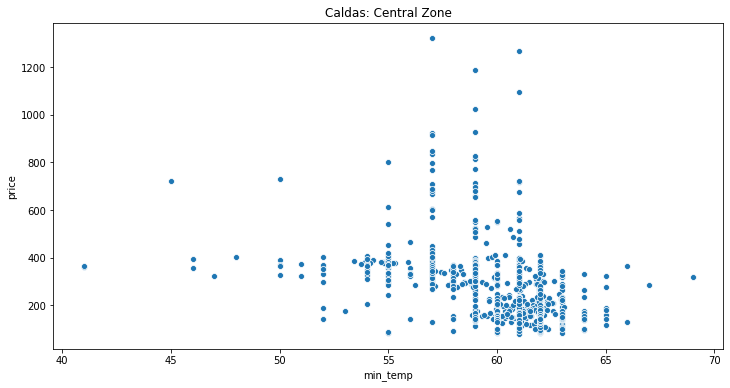

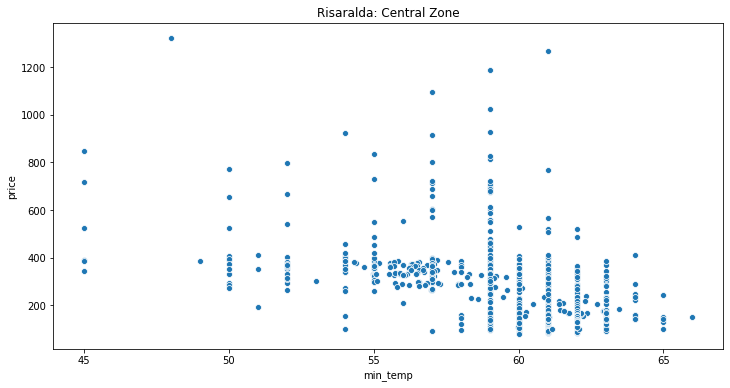

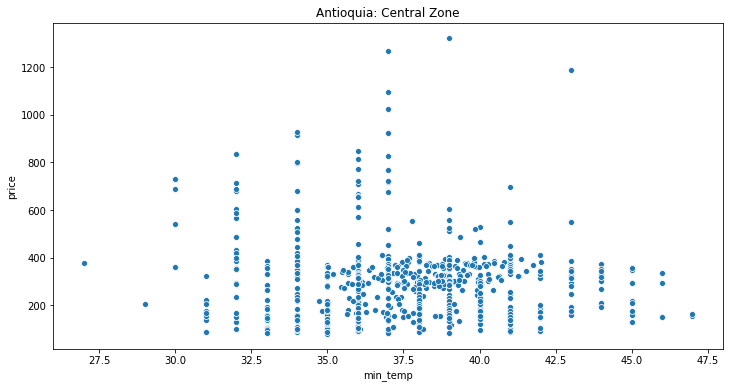

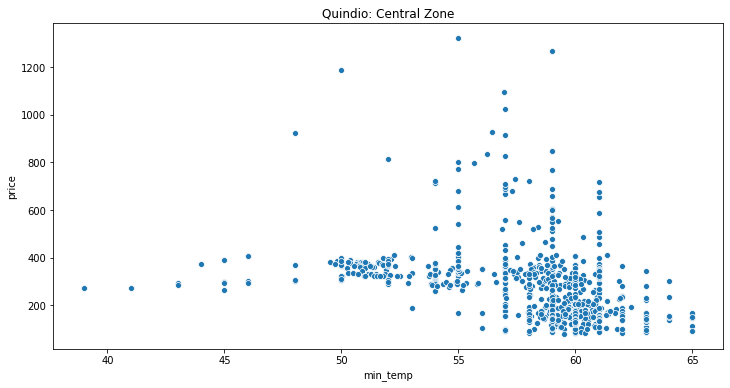

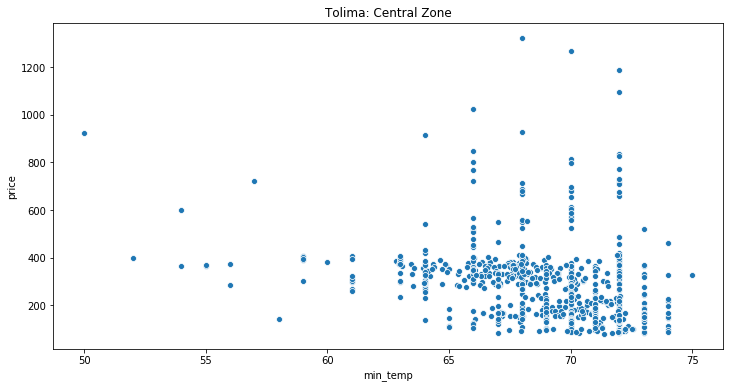

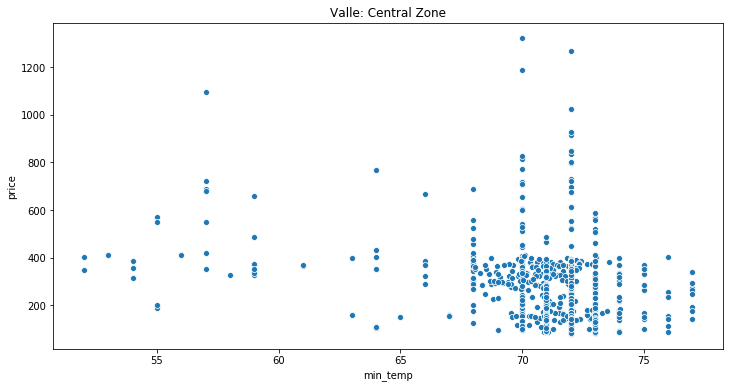

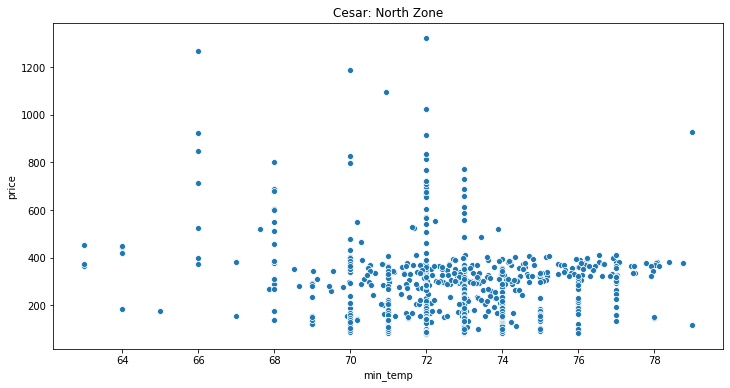

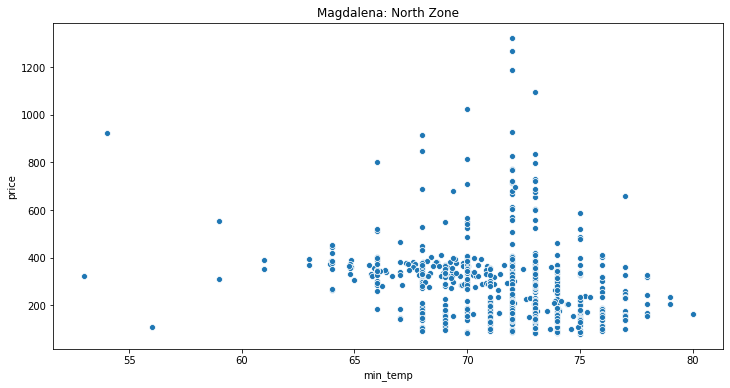

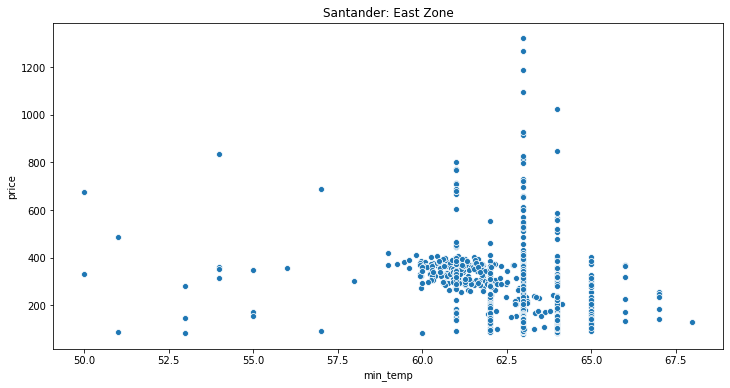

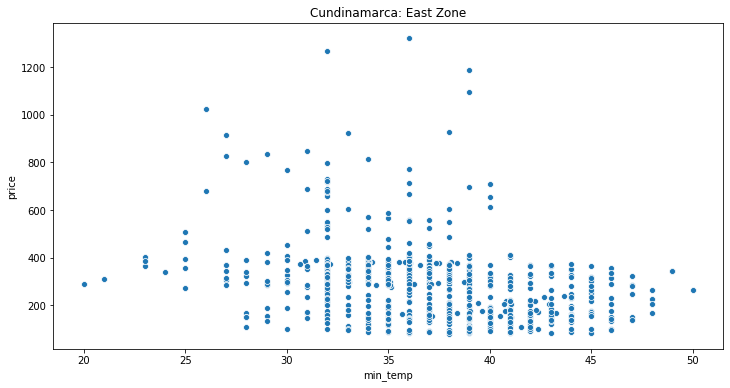

In [319]:
show_min_temp()

### Average Precipitation
- Does anything abnormal happen in any one region in regards to precipitation?

In [325]:
def precip():
    plt.figure(figsize=(12,6))
    sns.scatterplot(huila.precip, huila.price)
    plt.title('Huila: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cauca.precip, cauca.price)
    plt.title('Cauca: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(narino.precip, narino.price)
    plt.title('Narino: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(caldas.precip, caldas.price)
    plt.title("Caldas: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(risaralda.precip, risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(antioquia.precip, antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(quindio.precip, quindio.price)
    plt.title('Quindio: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(tolima.precip, tolima.price)
    plt.title('Tolima: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(valle.precip, valle.price)
    plt.title('Valle: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cesar.precip, cesar.price)
    plt.title('Cesar: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(magdalena.precip, magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(santander.precip, santander.price)
    plt.title("Santander: East Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cundinamarca.precip, cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.show()
    

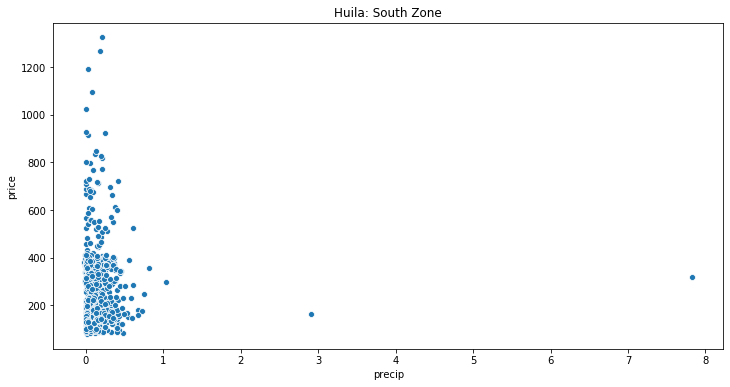

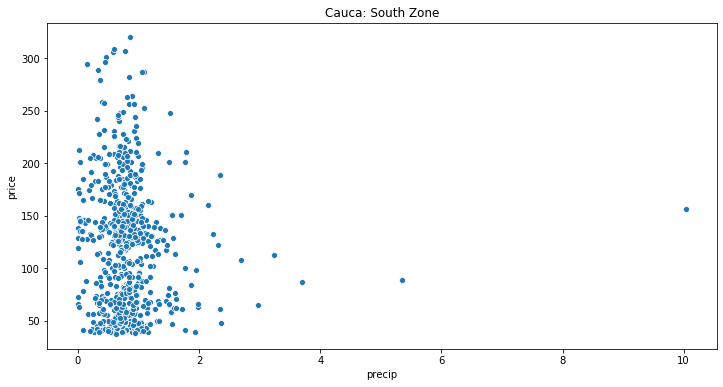

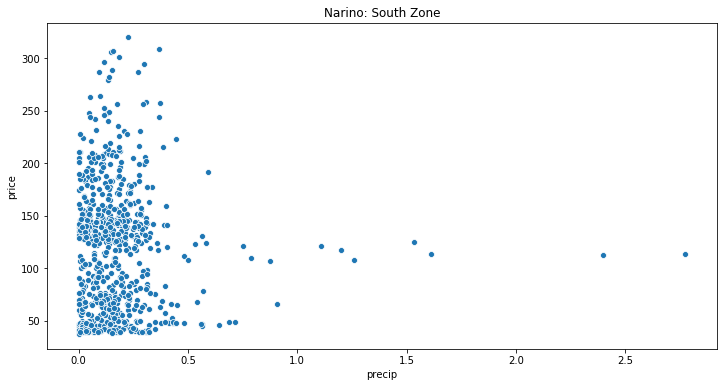

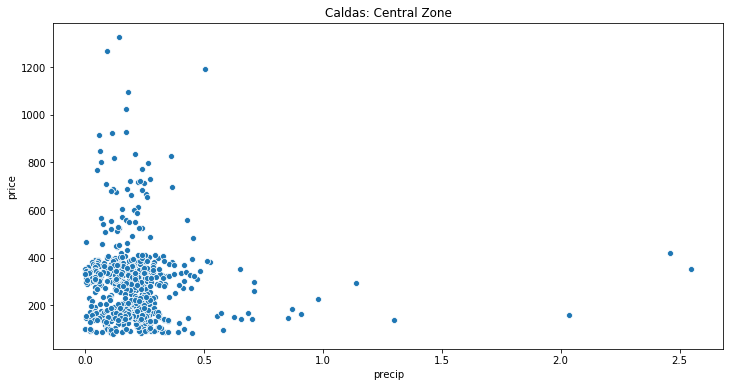

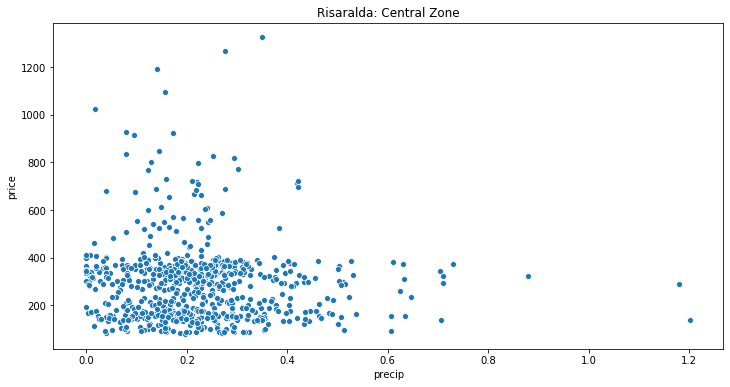

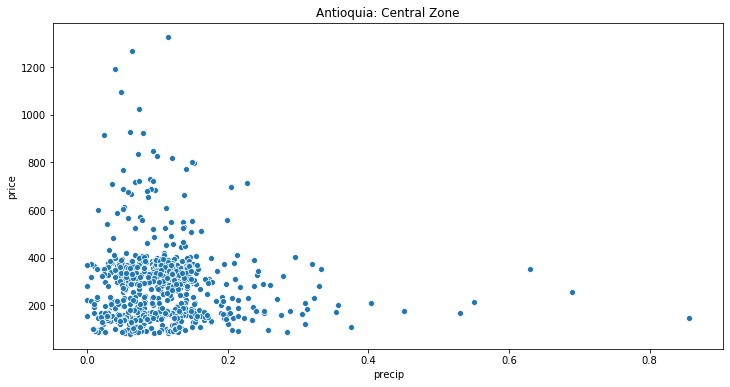

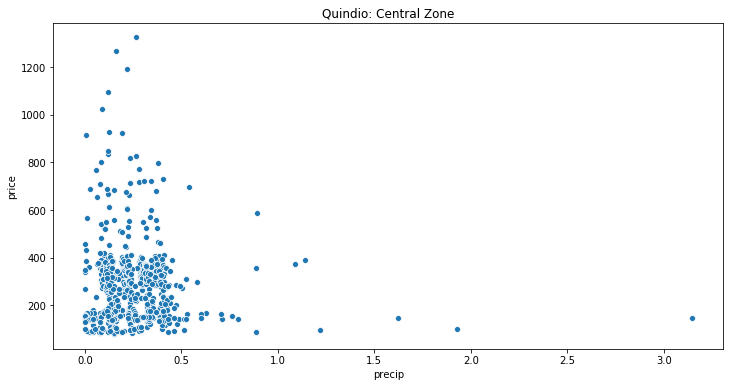

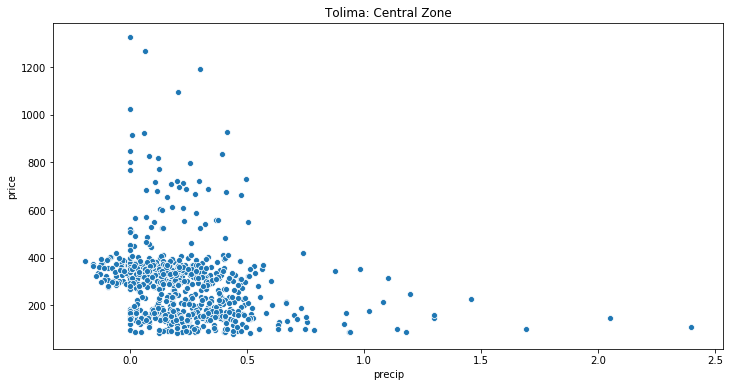

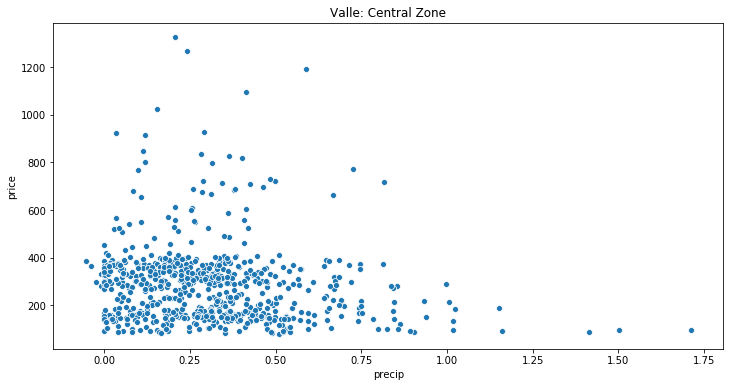

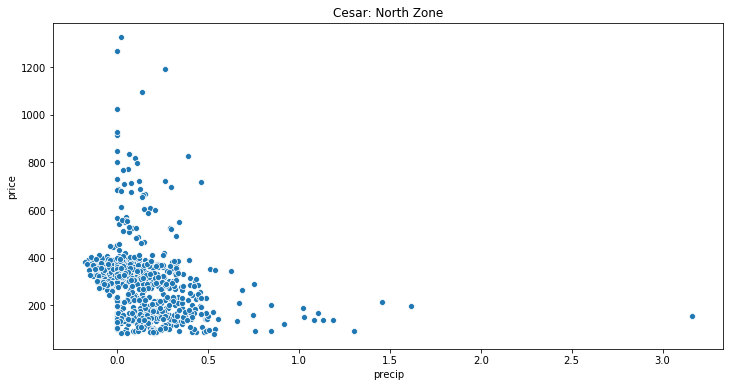

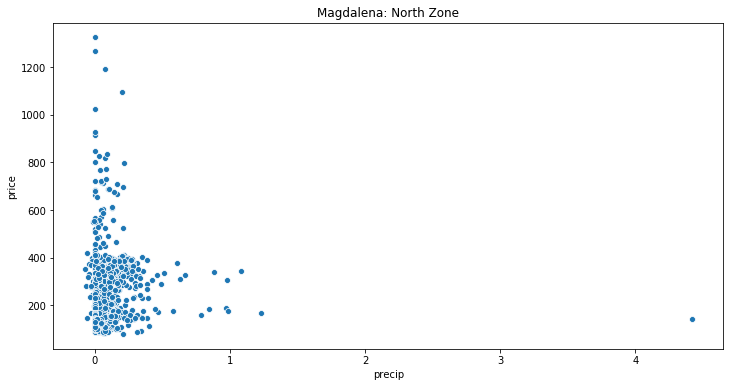

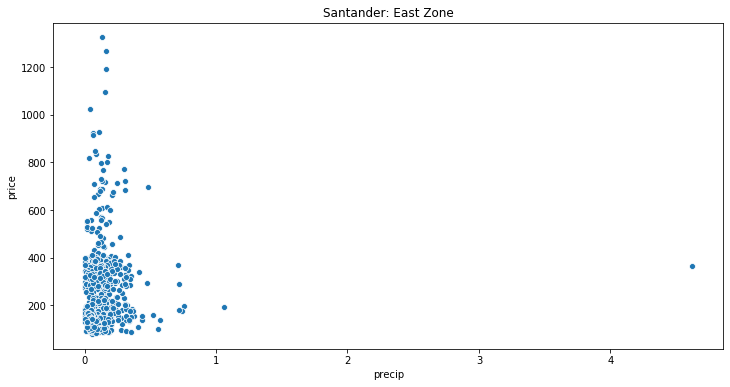

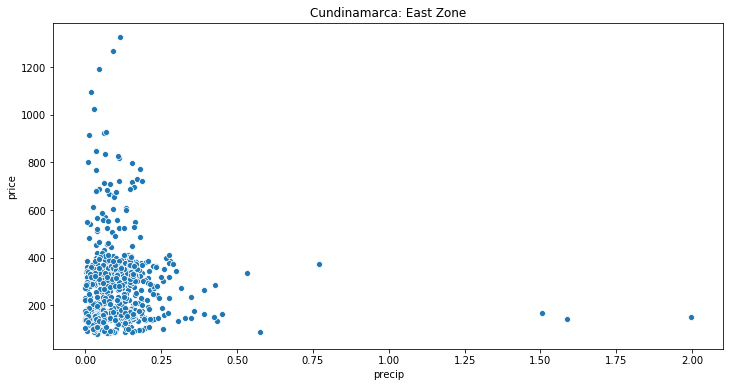

In [326]:
precip()

In [ ]:
# Thoughts: You can the difference in precipitaion in each region, but no real correlation with price.

### Quantity Sold
- How does the quantity of coffee relate to price of coffee?

In [330]:
def quantity():
    plt.figure(figsize=(12,6))
    sns.scatterplot(huila.quantity, huila.price)
    plt.title('Huila: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cauca.quantity, cauca.price)
    plt.title('Cauca: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(narino.quantity, narino.price)
    plt.title('Narino: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(caldas.quantity, caldas.price)
    plt.title("Caldas: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(risaralda.quantity, risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(antioquia.quantity, antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(quindio.quantity, quindio.price)
    plt.title('Quindio: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(tolima.quantity, tolima.price)
    plt.title('Tolima: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(valle.quantity, valle.price)
    plt.title('Valle: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cesar.quantity, cesar.price)
    plt.title('Cesar: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(magdalena.quantity, magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(santander.quantity, santander.price)
    plt.title("Santander: East Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.scatterplot(cundinamarca.quantity, cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.show()
    

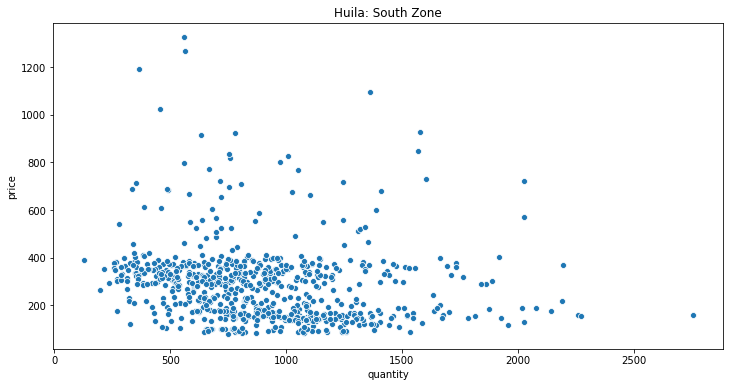

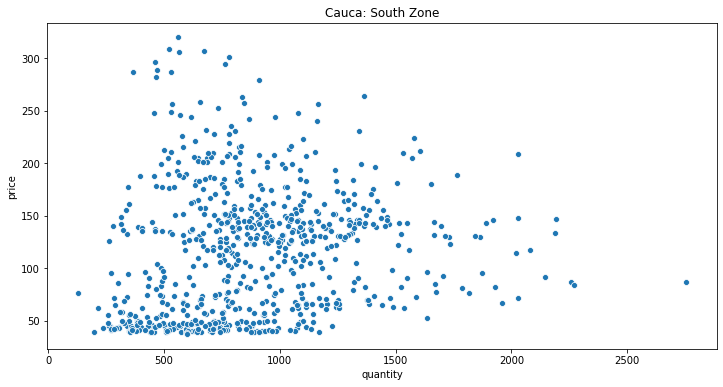

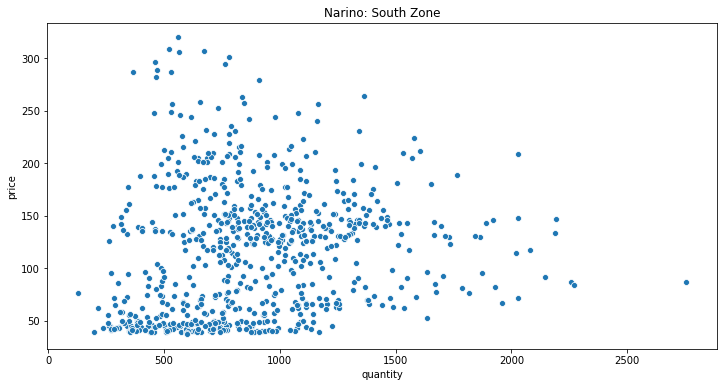

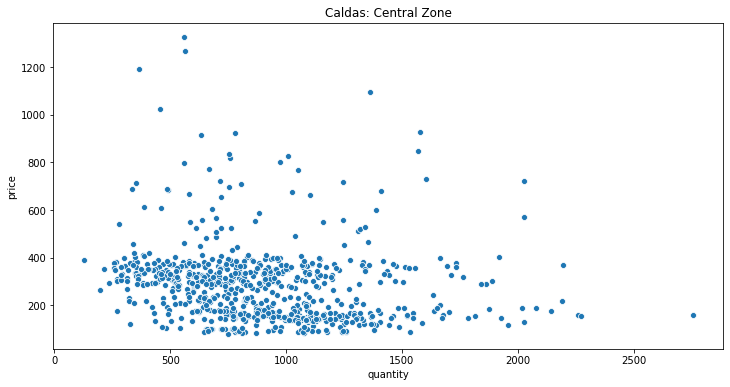

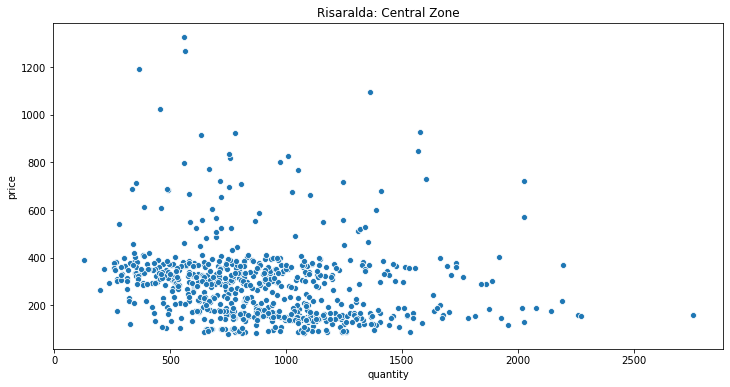

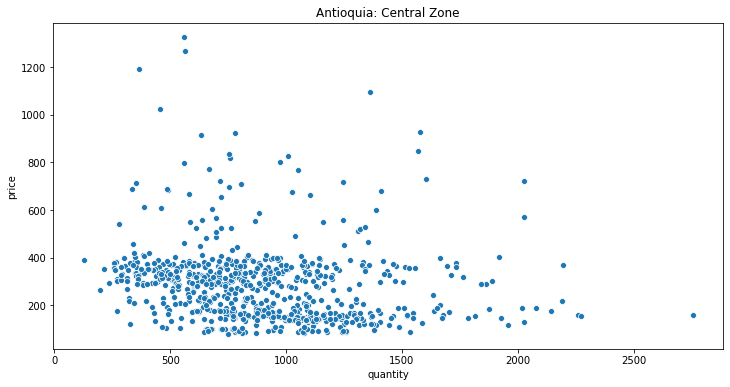

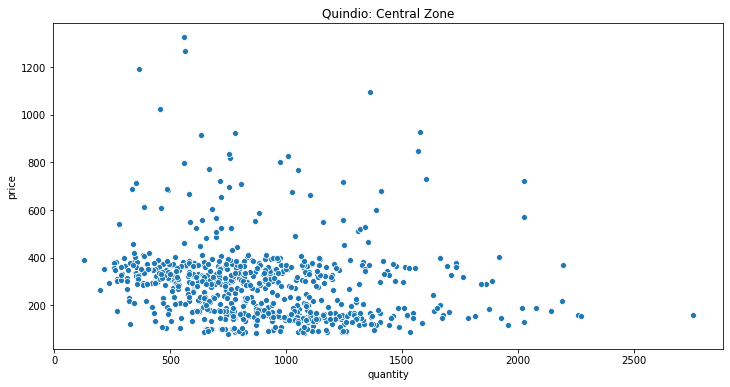

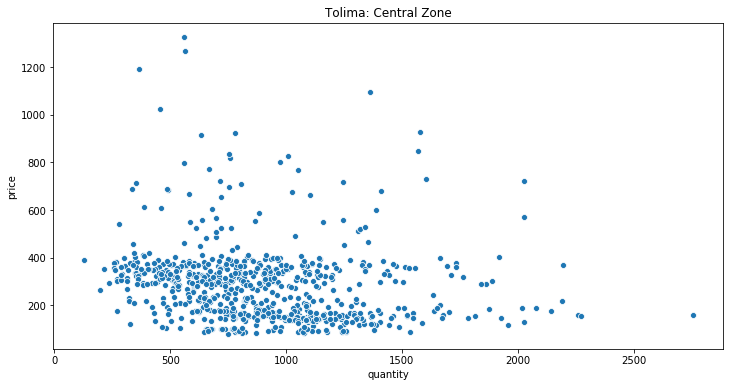

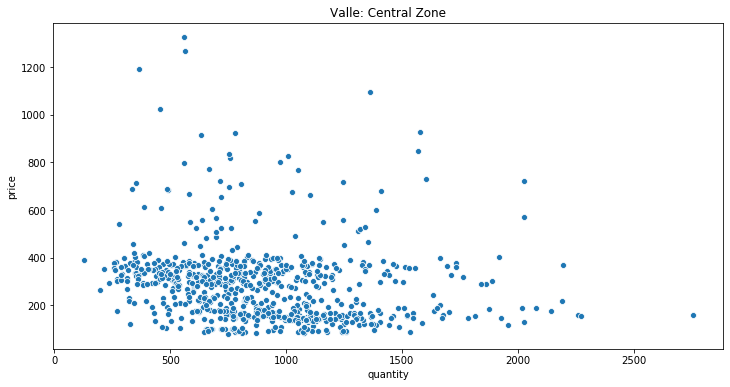

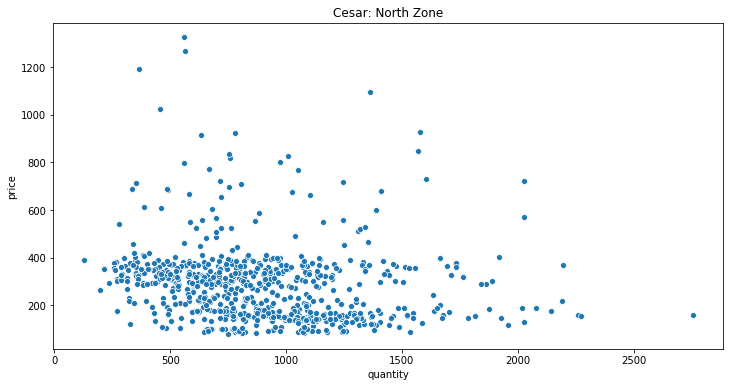

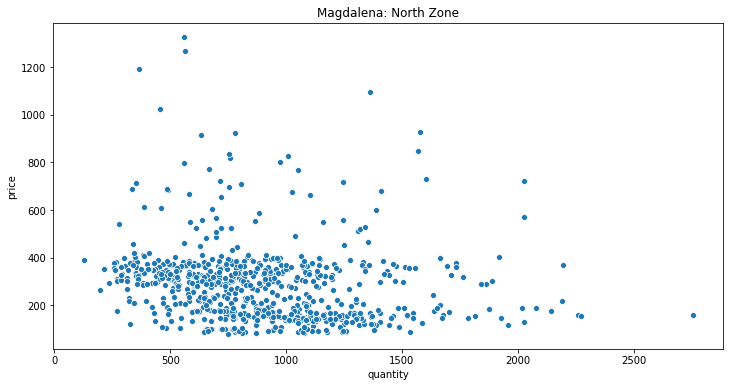

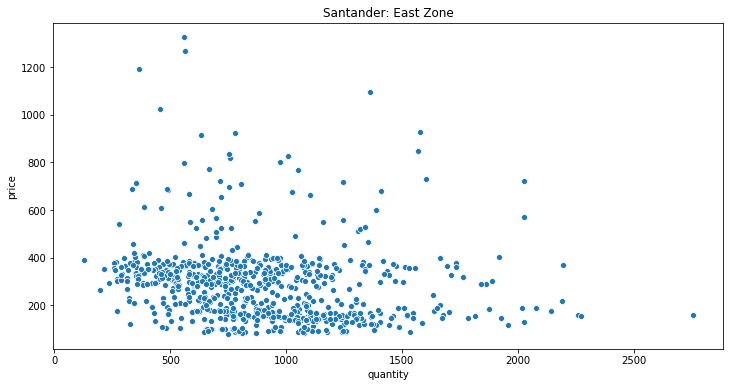

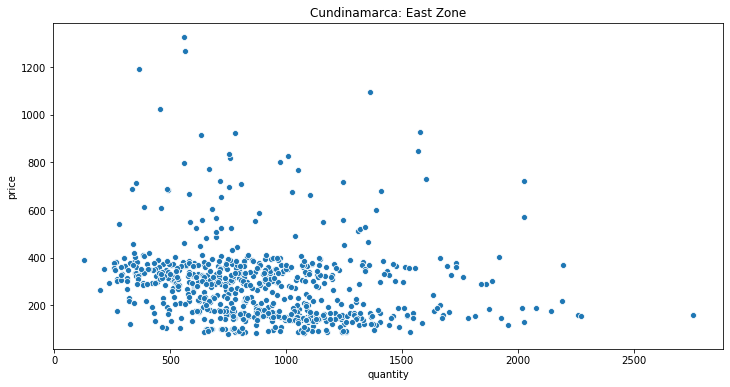

In [331]:
# Does quantity impact coffee prices?
quantity()

In [ ]:
# Thoughts 

### Price
- Look at the overall distribution of price throughout our timeline

In [311]:
def show_price():
    plt.figure(figsize=(12,6))
    plt.plot(huila.price)
    plt.title('Huila: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(cauca.price)
    plt.title('Cauca: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(narino.price)
    plt.title('Narino: South Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(caldas.price)
    plt.title("Caldas: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(risaralda.price)
    plt.title('Risaralda: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(antioquia.price)
    plt.title("Antioquia: Central Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(quindio.price)
    plt.title('Quindio: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(tolima.price)
    plt.title('Tolima: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(valle.price)
    plt.title('Valle: Central Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(cesar.price)
    plt.title('Cesar: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(magdalena.price)
    plt.title('Magdalena: North Zone')
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(santander.price)
    plt.title("Santander: East Zone")
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(cundinamarca.price)
    plt.title("Cundinamarca: East Zone")
    plt.show()
    

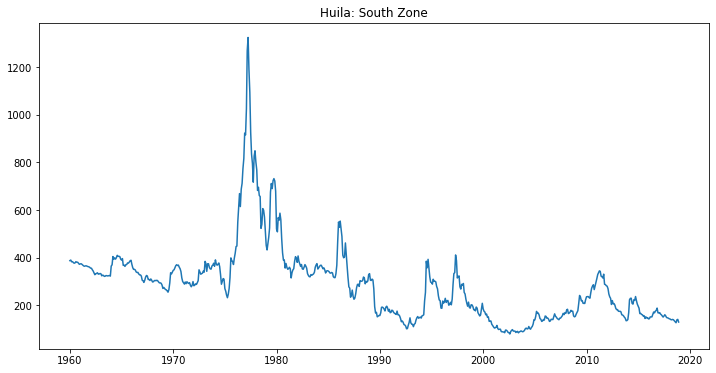

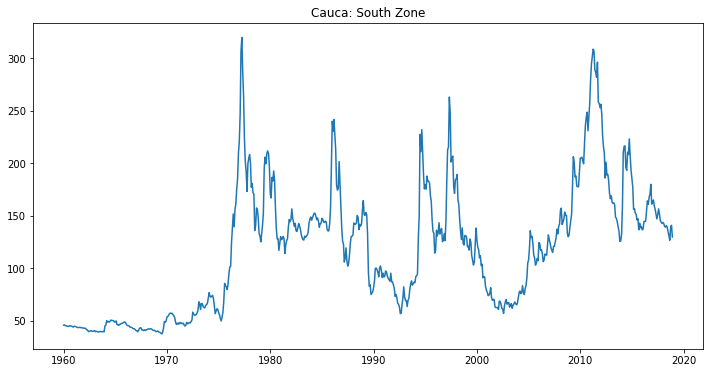

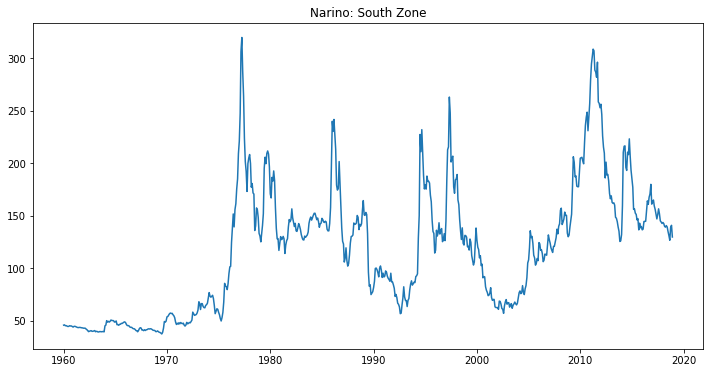

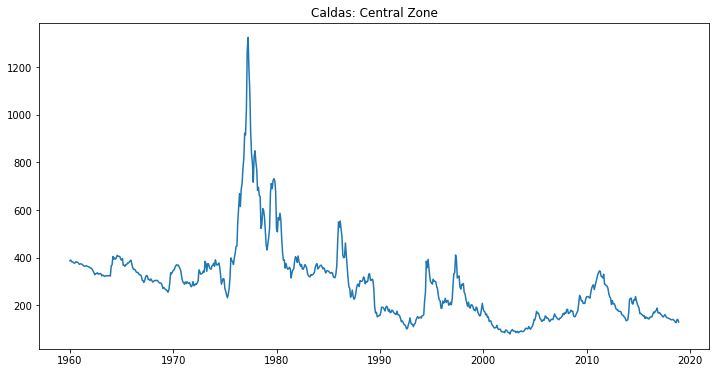

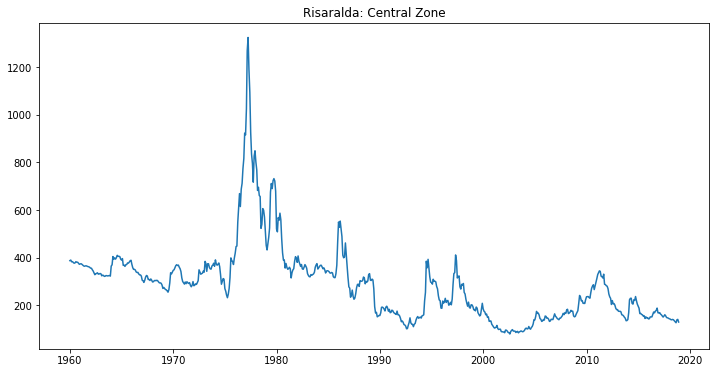

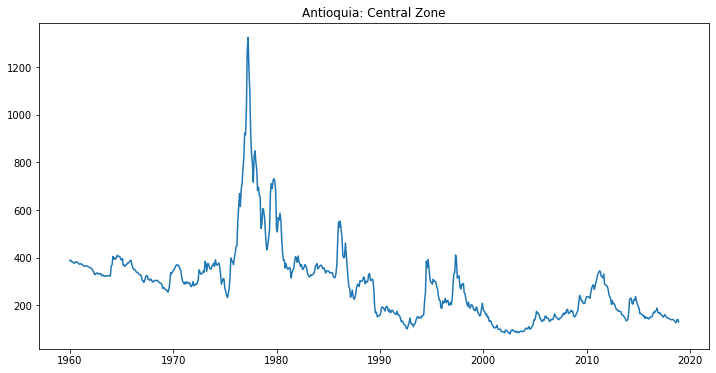

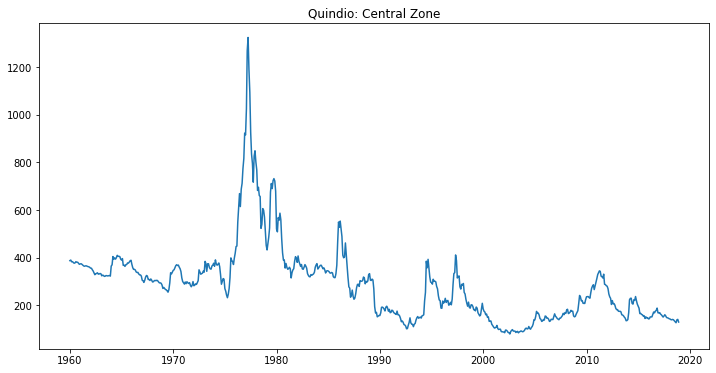

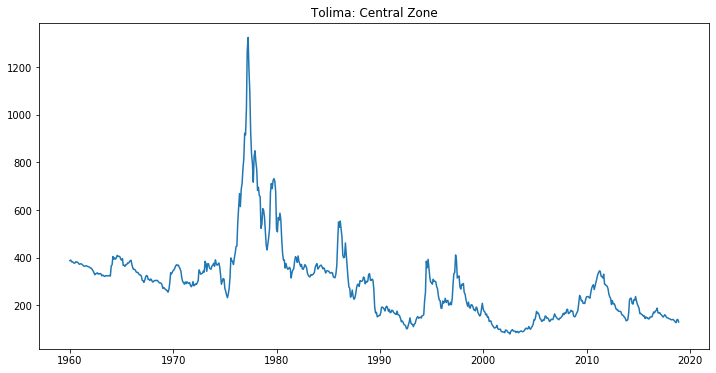

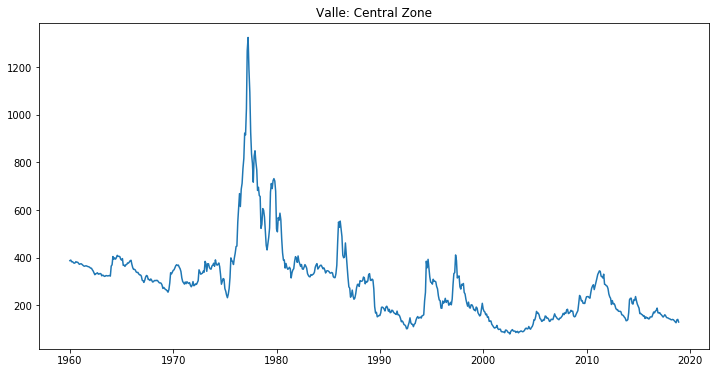

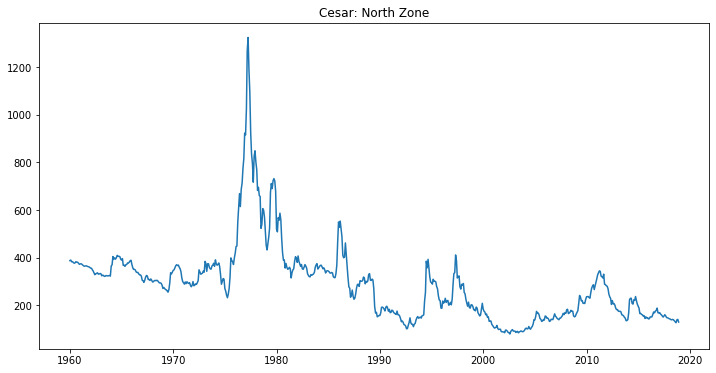

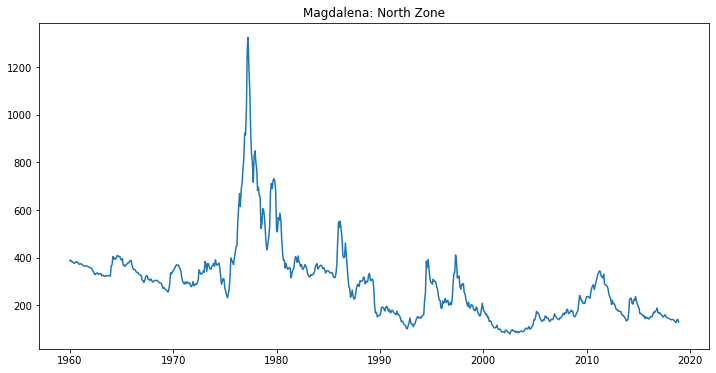

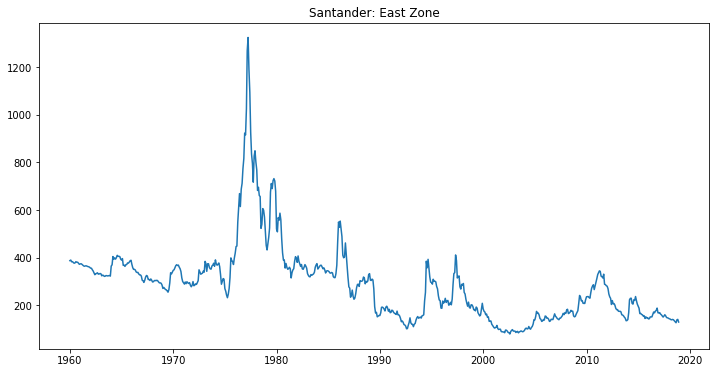

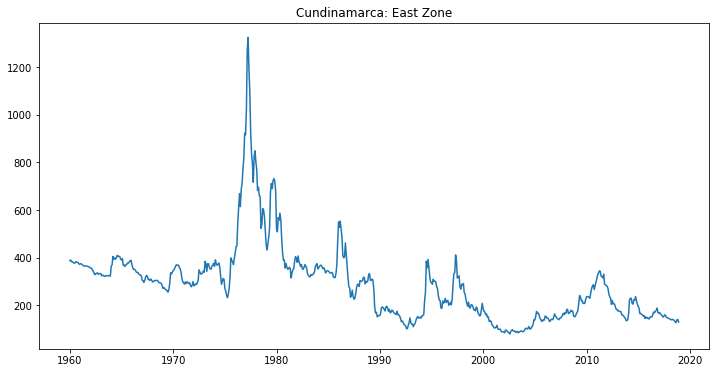

In [312]:
# Look at price distributions
show_price()

In [ ]:
# thoughts: There is a difference in distribution two graphs, Cauca and narino
# Look into those closer 

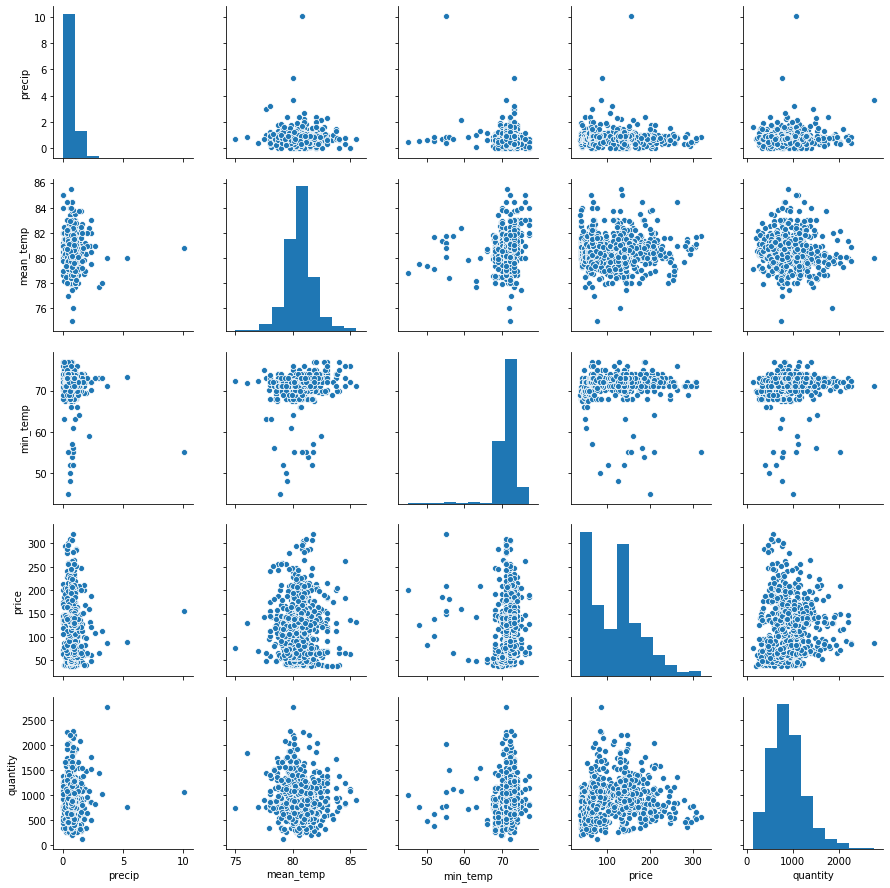

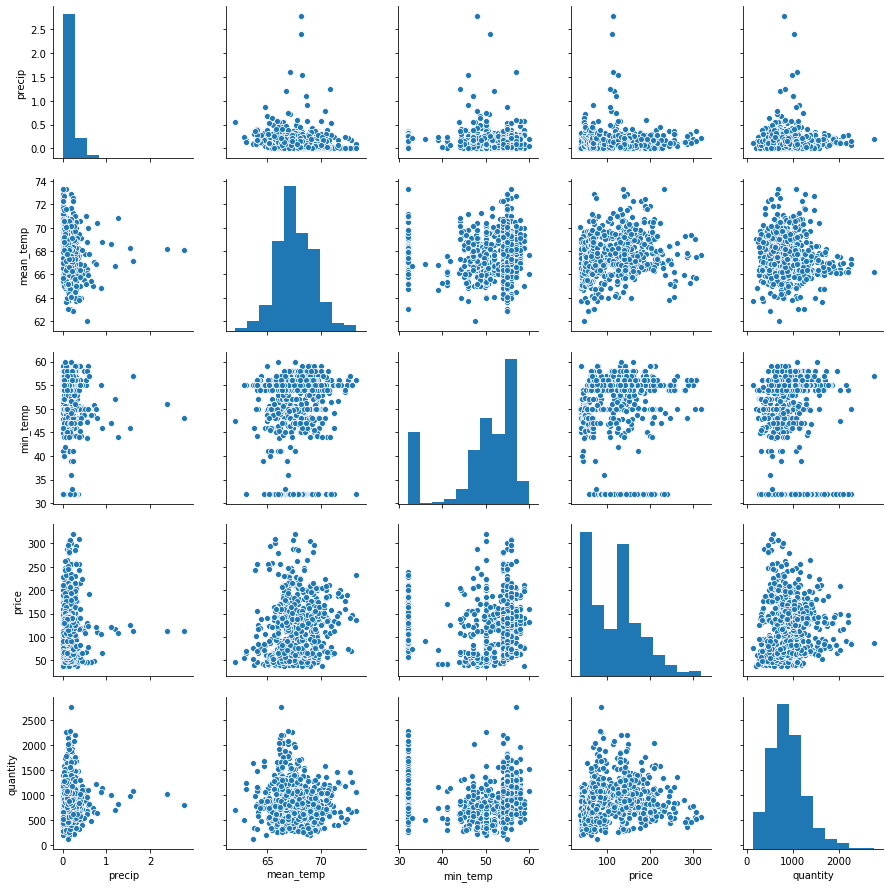

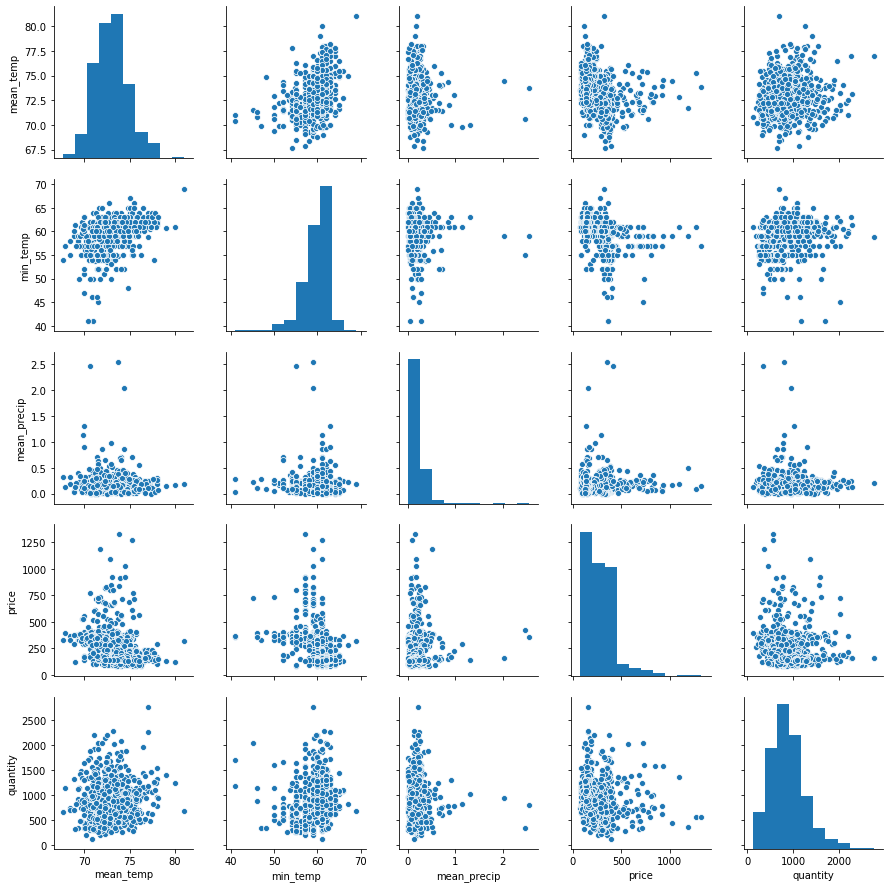

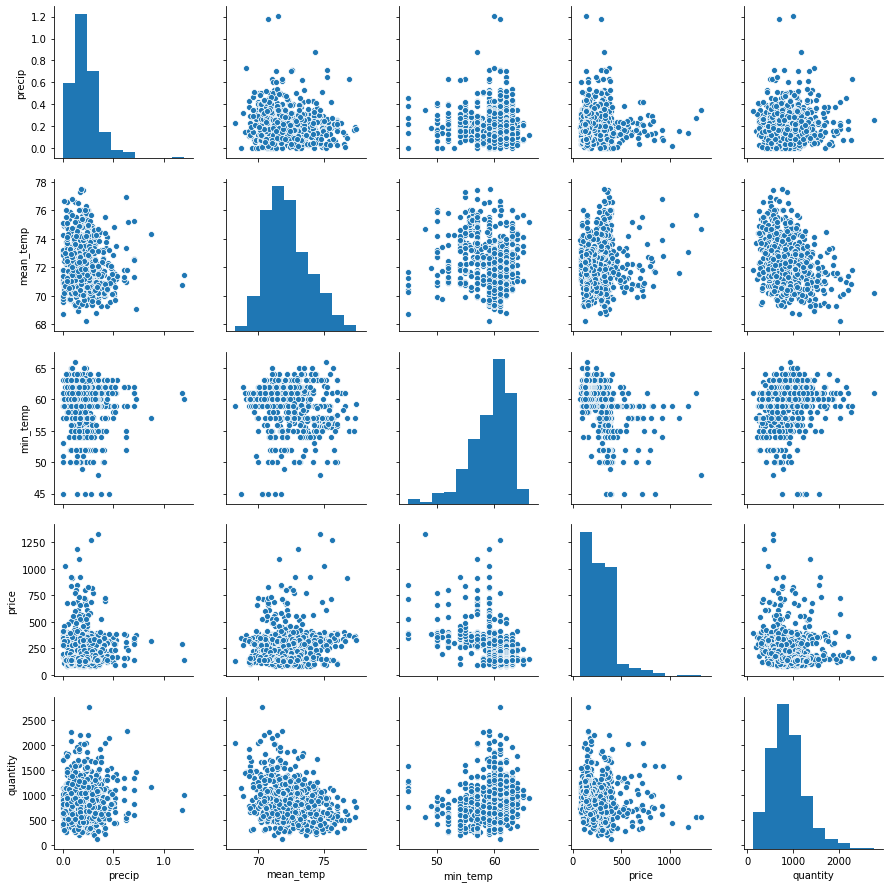

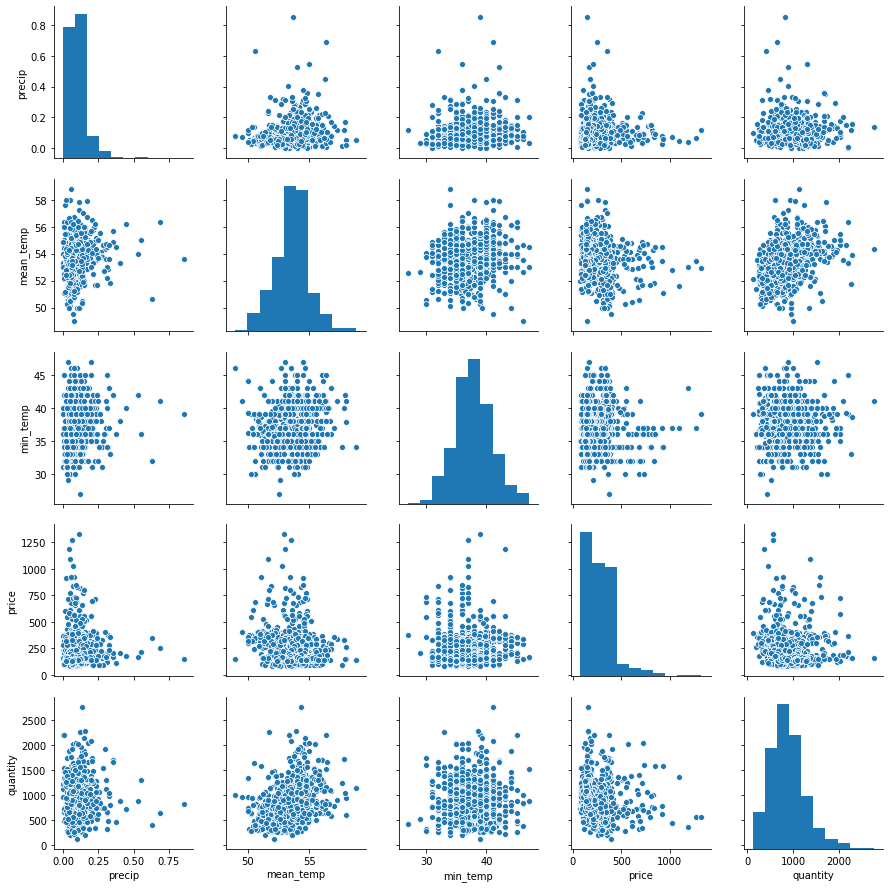

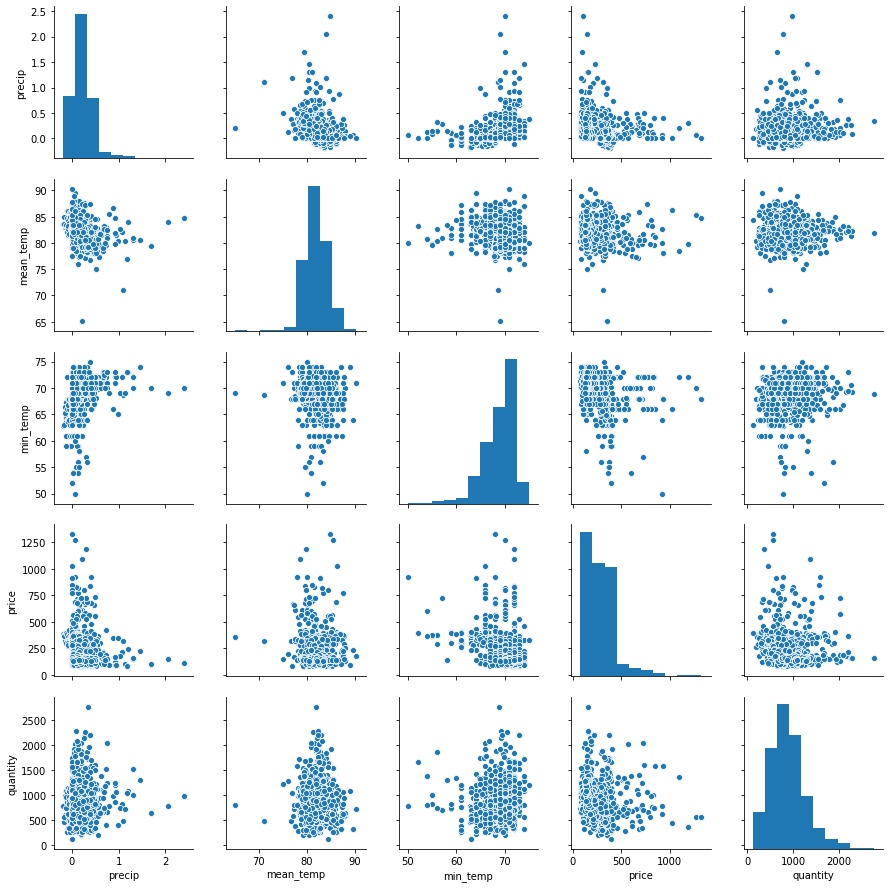

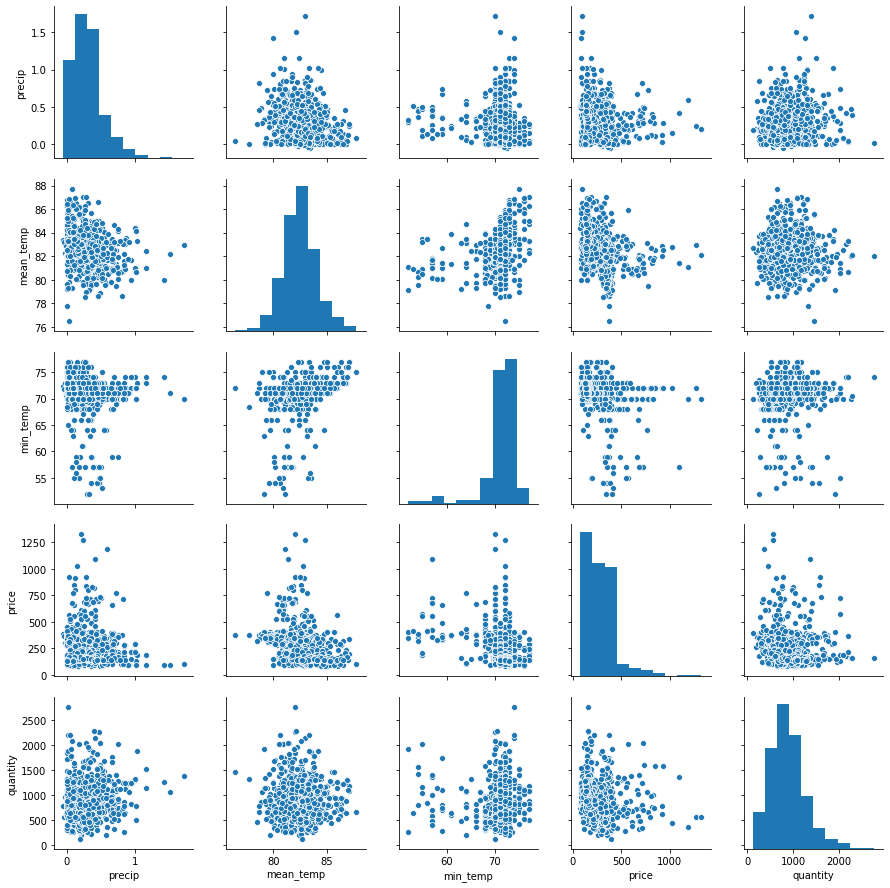

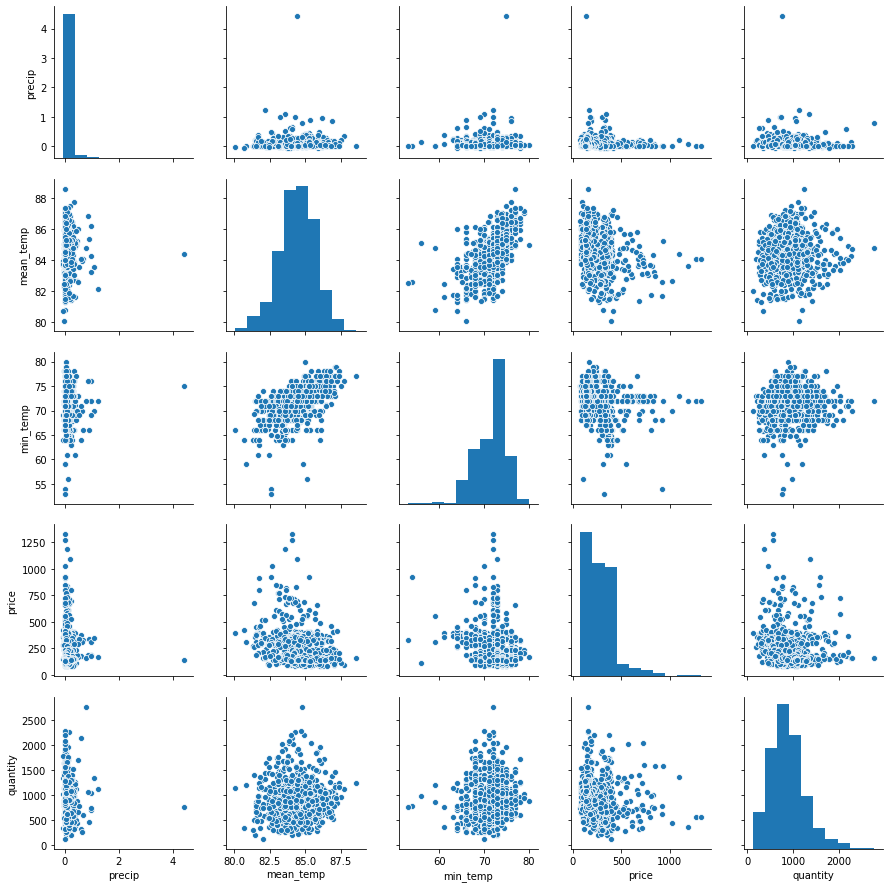

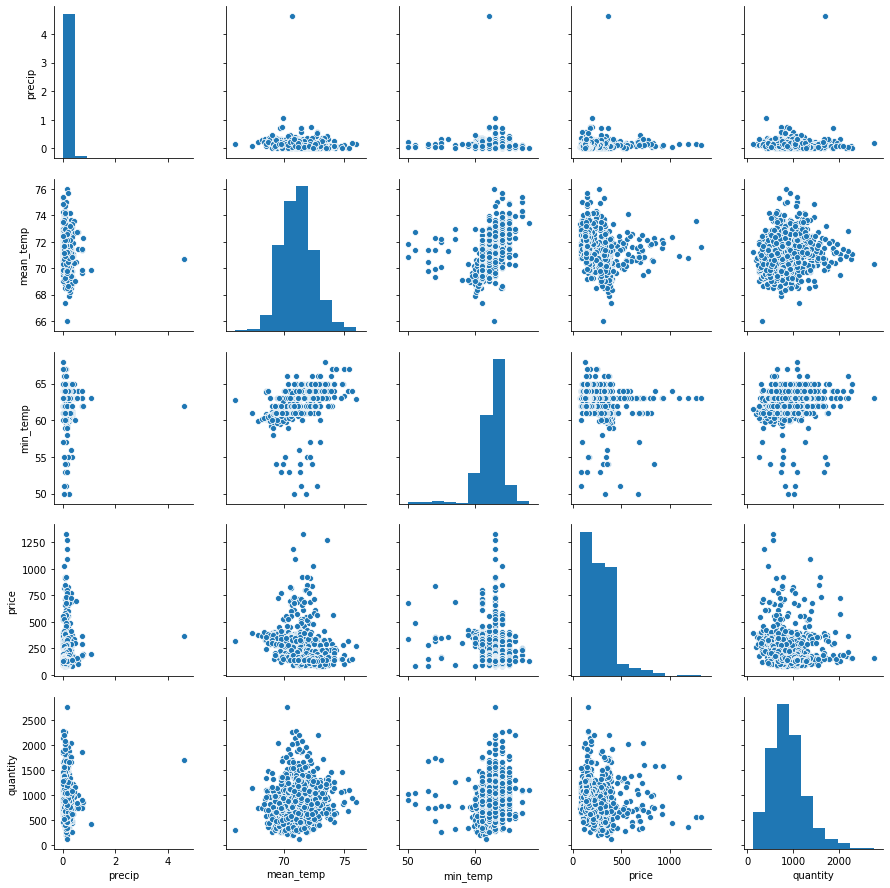

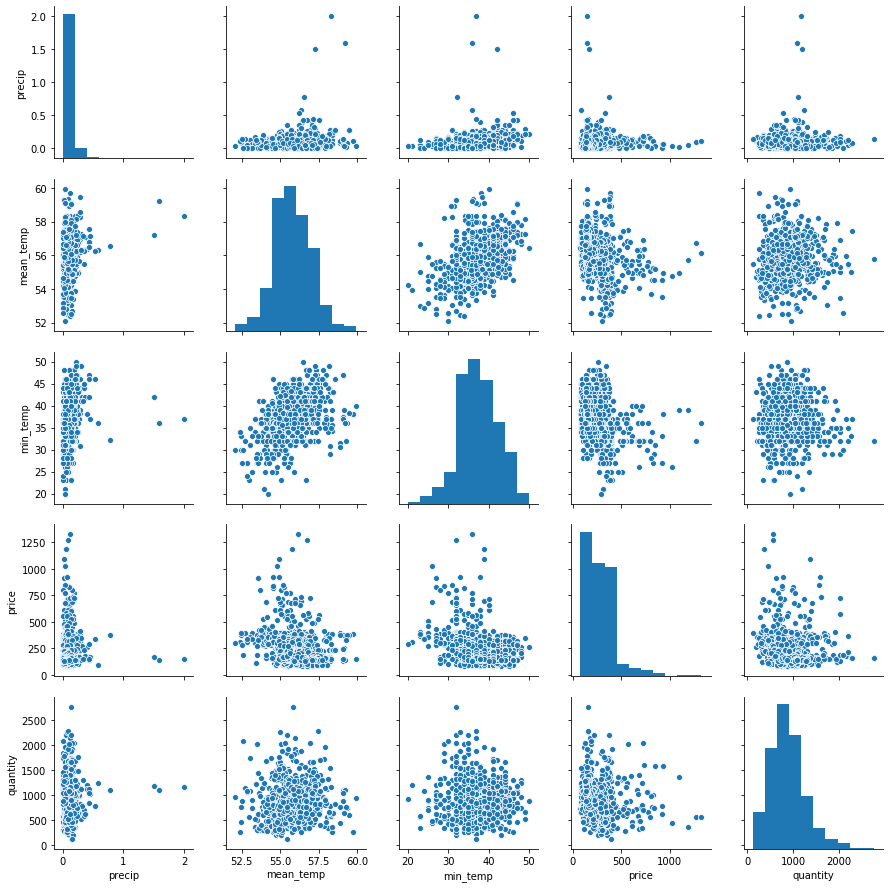

In [309]:
sns.pairplot(huila)
sns.pairplot(cauca)
sns.pairplot(narino)
sns.pairplot(caldas)
sns.pairplot(risaralda)
sns.pairplot(antioquia)
sns.pairplot(quindio)
sns.pairplot(tolima)
sns.pairplot(valle)
sns.pairplot(cesar)
sns.pairplot(magdalena)
sns.pairplot(santander)
sns.pairplot(cundinamarca)

#### How does the delta in temperatures relate to price?

In [ ]:
df.head()

In [ ]:
df1 = df.drop(columns=(['price', 'quantity']))

In [ ]:
df1.head(3)

In [ ]:
df1['mean_temp'] = ((df1.Caldas_mean_temp + df1.Narino_mean_temp + 
                    df1.Antioquia_mean_temp + df1.Cauca_mean_temp + 
                    df1.Quindio_mean_temp + df1.Magdalena_mean_temp +
                    df1.Huila_mean_temp + df1.Risaralda_mean_temp + 
                    df1.Tolima_mean_temp + df1.Santander_mean_temp +
                    df1.Cesar_mean_temp + df1.Valle_mean_temp + df1.Cundinamarca_mean_temp) / 13)

In [ ]:
df1.head(1)

In [ ]:
df1['min_temp'] = ((df1.Caldas_min_temp + df1.Narino_min_temp + 
                    df1.Antioquia_mean_temp + df1.Cauca_min_temp + 
                    df1.Quindio_min_temp + df1.Magdalena_min_temp +
                    df1.Huila_min_temp + df1.Risaralda_min_temp + 
                    df1.Tolima_min_temp + df1.Santander_min_temp +
                    df1.Cesar_min_temp + df1.Valle_min_temp + df1.Cundinamarca_min_temp) / 13)

In [ ]:
df1.head(1)

In [ ]:
df1 = df1[['mean_temp', 'min_temp']]

In [ ]:
df1.head(2)

In [ ]:
df1['delta'] = (df1.mean_temp - df1.min_temp)

In [ ]:
df1.head(1)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df1.delta.resample('Y').mean())
plt.show()

In [ ]:
df1['price'] = df.inflated

In [ ]:
# Look at the delta, what am I looking at with this? What question am I looking to ask?
plt.figure(figsize=(10,5))
sns.scatterplot(df1.delta, df1.price)
plt.title('')
plt.show()

In [ ]:
sns.pairplot(df1)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(df1.price, df1.delta)
plt.title('Is there a relationship between the delta in temp and price?')
plt.show()